# **Importar librerias**

In [ ]:
#!pip install scipy==1.4.0

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from scipy.optimize import differentialevolution
from scipy import optimize

%matplotlib inline

# **Base de datos a utilizar**

In [ ]:
url = 'https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv'
df = pd.read_csv(url)

In [ ]:
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [ ]:
df.info()
#print(len((df["waterfront"] == 1) == True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe().T

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788396e+03  8.280898e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

# **Analisis de las variables y salida y tratamiento de datos**

## **Descripcion de las variables**



*   id: ID of the house
*   date: Data of house sold
*   bedrooms: Number of bedrooms
*   bathroooms: Number of bathrooms
*   sqft_living: Square footage of house
*   sqft_lot: Square footage of lot
*   floors: Number of floors/ Level
*   waterfront: 1 = Waterfront view; 0 = No waterfront view
*   view: 1 = House been viewed; 0 = House has not been viewed
*   condition: 1 indicates worn out property and 5 excellent
*   grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent
*   sqft_above: Square footage of house apart from basement
*   sqft_basement: Square footage of the basement
*   yr_built: Year of house built
*   yr_renovated: Year of house renovated
*   zipcode: Zip code
*   lat: Latitude coordination
*   long: Longitude coordination
*   sqft_living15: Square footage of house in 2015 (implies-- some renovations)
*   sqft_lot15: Square footage of lot in 2015 (implies-- some renovations)

## **Se eliminan datos que no son relevantes**

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

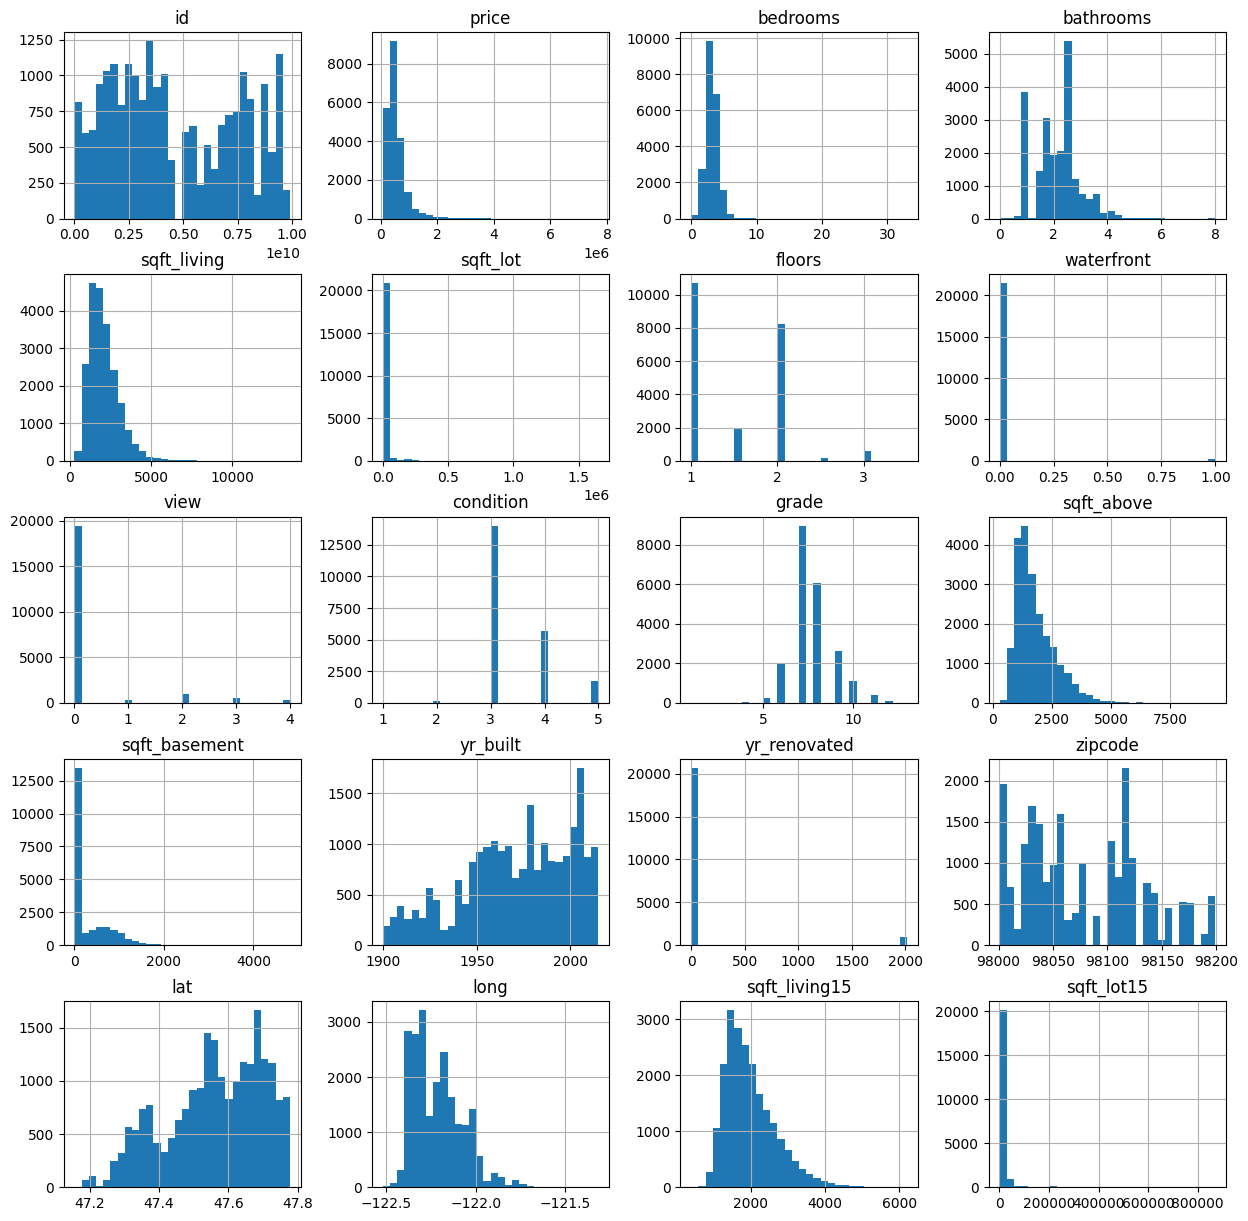

In [ ]:
df.hist(figsize=[15,15], bins=30)

<Figure size 1000x1000 with 0 Axes>

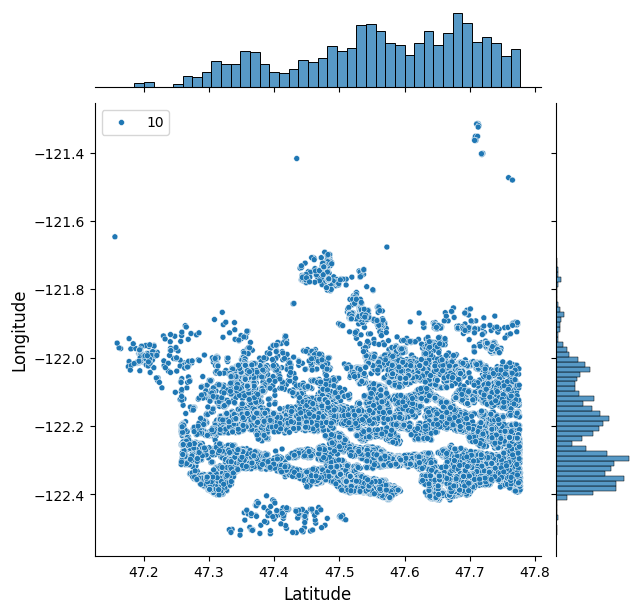

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [ ]:
data = df
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
# plt1 = plt()
sns.despine

In [ ]:
#df.drop('sqft_lot', axis = 1, inplace = True)
#df.drop('condition', axis = 1, inplace = True)
#df.drop('grade', axis = 1, inplace = True)
#df.drop('sqft_basement', axis = 1, inplace = True)
#df.drop('sqft_above', axis = 1, inplace = True)
#df.drop('yr_built', axis = 1, inplace = True)
#df.drop('yr_renovated', axis = 1, inplace = True)
#df.drop('lat', axis = 1, inplace = True)
#df.drop('long', axis = 1, inplace = True)
#df.drop('sqft_living15', axis = 1, inplace = True)
#df.drop('sqft_lot15', axis = 1, inplace = True)
#df.drop('view', axis = 1, inplace = True)
#df.drop('waterfront', axis = 1, inplace = True)
#df.drop('zipcode', axis = 1, inplace = True)

In [ ]:
df = df.drop('id', axis=1)
df = df.drop('zipcode',axis=1)

df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

## **Analisis de valores faltantes**

In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

## **Visualizar la correlación de los datos**

In [ ]:
#numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a pairplot
#sns.pairplot(df[numeric_columns], diag_kind='kde')
#plt.show()


<Axes: >

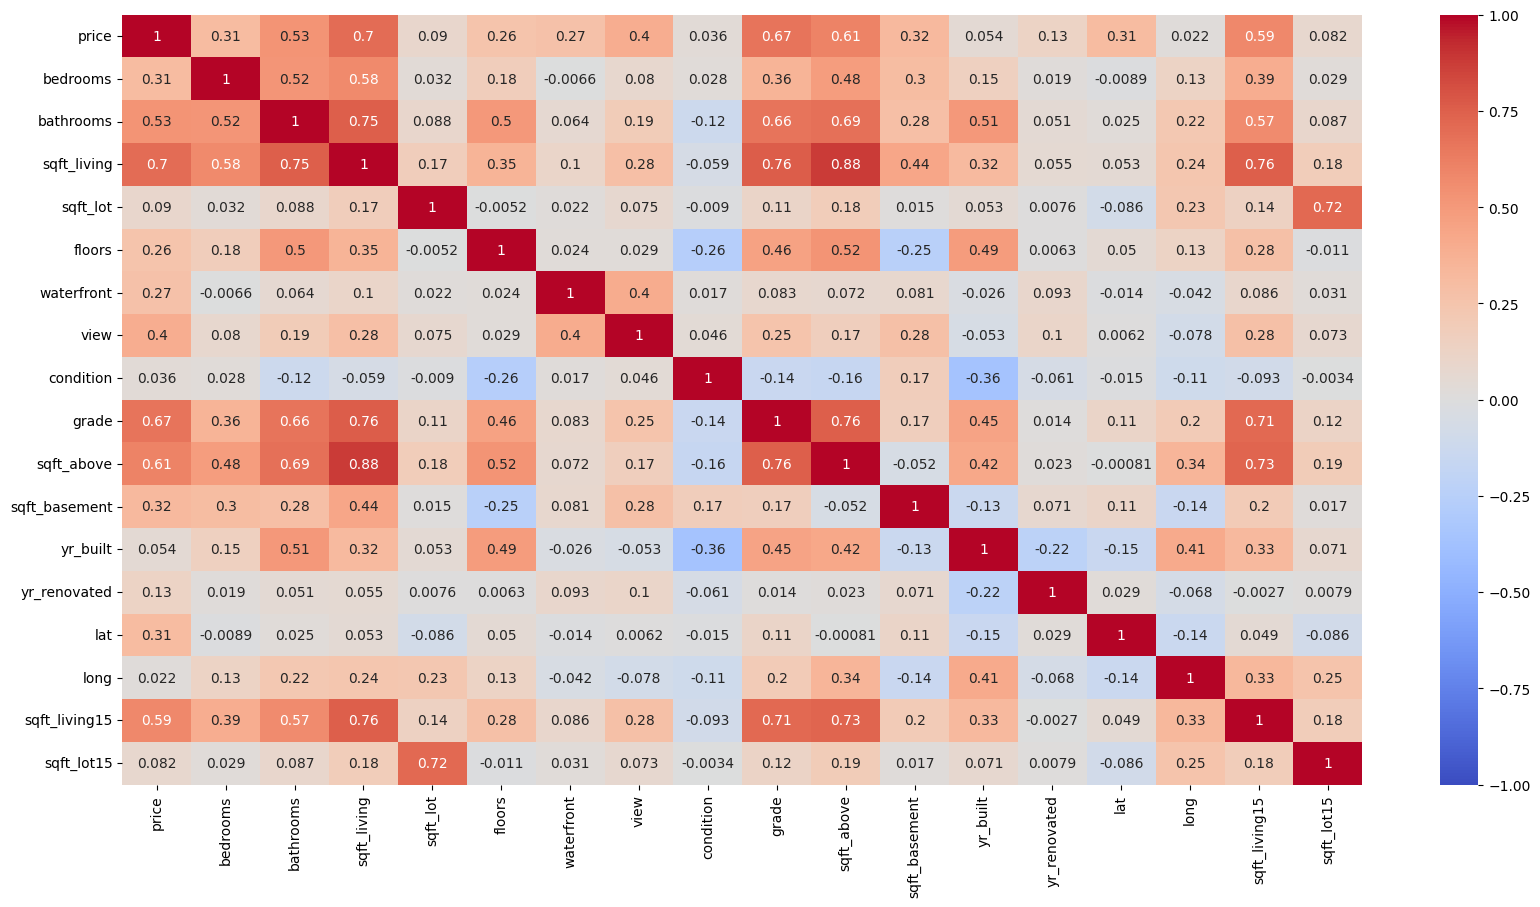

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop(['month', 'year'], axis=1).corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
df = df.drop(['sqft_living15', 'sqft_lot15', 'sqft_above'], axis=1) #'sqft_above',

## **Relación de las entradas con la salida**

In [ ]:
#data = pd.concat([y, x['bedrooms']], axis=1)
#data.plot().scatter(x='bedrooms', y='price')

<ipython-input-115-d2ca1ee1c75a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], ax=axes[0])


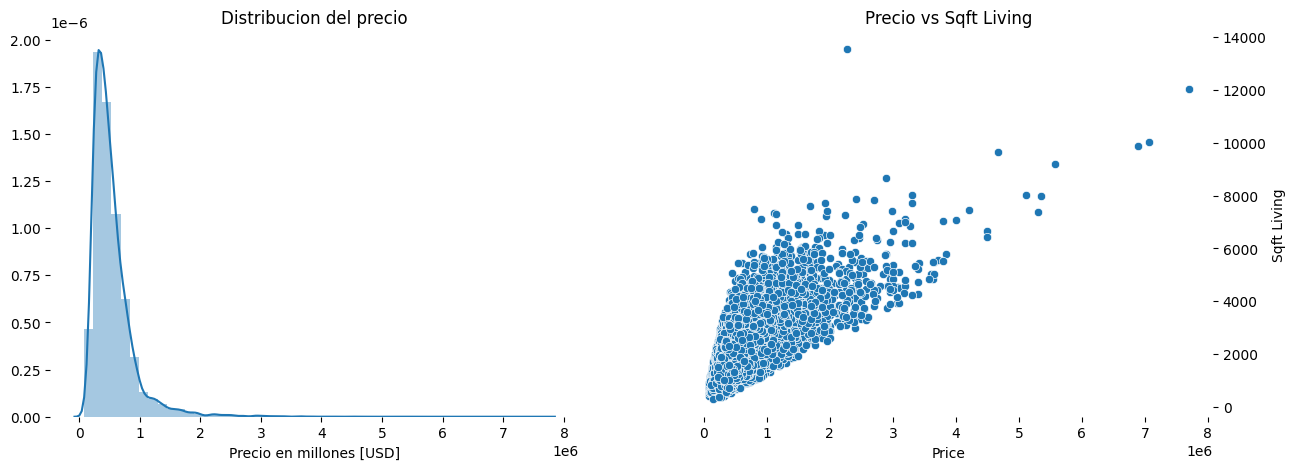

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Precio en millones [USD]', ylabel='', title='Distribucion del precio')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Precio vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

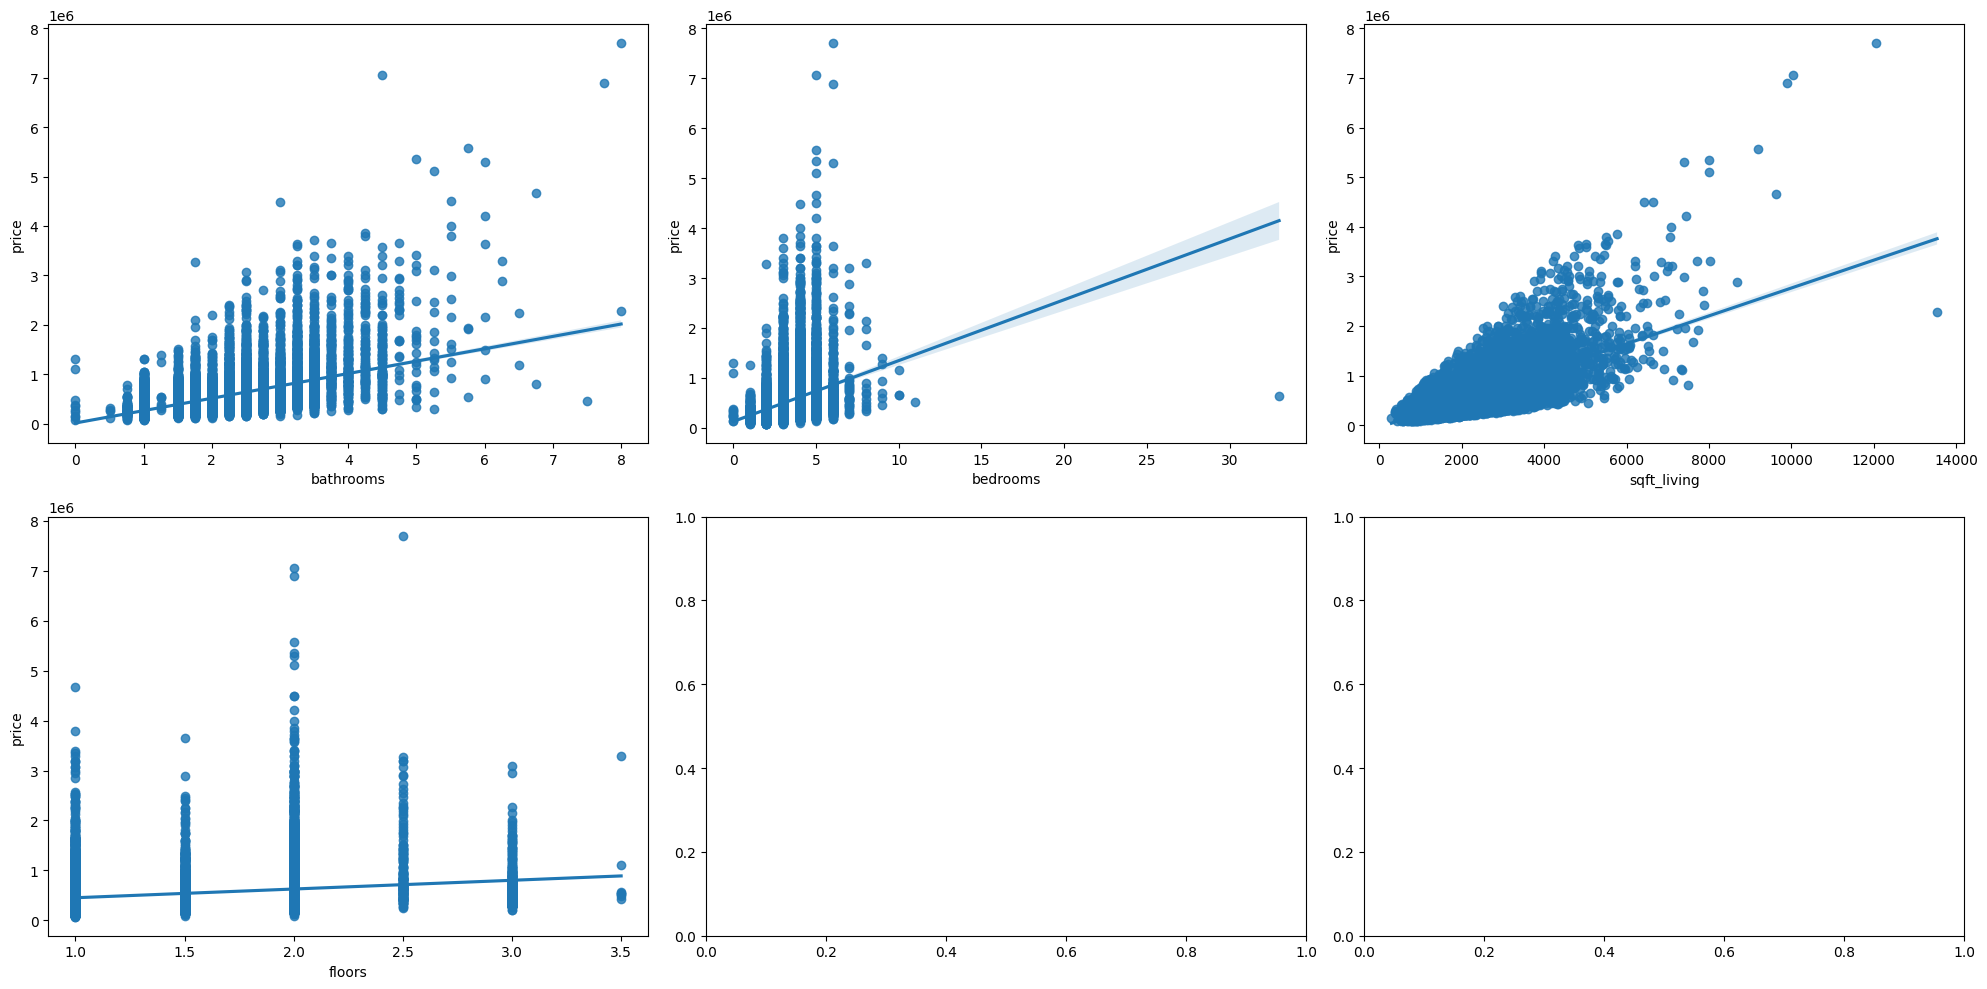

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))
sns.regplot(y = df['price'], x = df['bathrooms'], ax = axs[0, 0])
sns.regplot(y = df['price'], x = df['bedrooms'], ax = axs[0, 1])
sns.regplot(y = df['price'], x = df['sqft_living'], ax = axs[0, 2])
sns.regplot(y = df['price'], x = df['floors'], ax = axs[1, 0])
# sns.regplot(y = df['price'], x = df['waterfront'], ax = axs[1, 1])
#sns.regplot(y = df['price'], x = df['zipcode'], ax = axs[1, 1])
plt.tight_layout()

## **Distribuciónes**

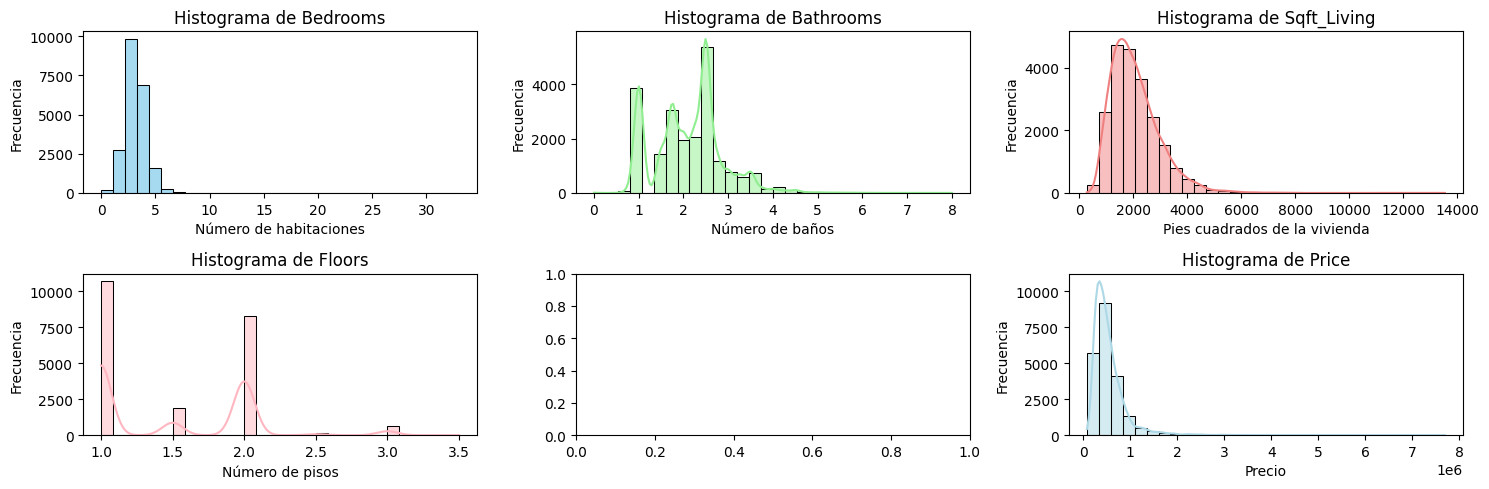

In [ ]:
# Crear subplots para los histogramas de cada variable
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# Graficar histograma de bedrooms
sns.histplot(df['bedrooms'].dropna(), ax=axes[0, 0], color='skyblue', kde=False, bins=30)
axes[0, 0].set_title('Histograma de Bedrooms')
axes[0, 0].set_xlabel('Número de habitaciones')
axes[0, 0].set_ylabel('Frecuencia')

# Graficar histograma de bathrooms
sns.histplot(df['bathrooms'].dropna(), ax=axes[0, 1], color='lightgreen', kde=True, bins=30)
axes[0, 1].set_title('Histograma de Bathrooms')
axes[0, 1].set_xlabel('Número de baños')
axes[0, 1].set_ylabel('Frecuencia')

# Graficar histograma de sqft_living
sns.histplot(df['sqft_living'].dropna(), ax=axes[0, 2], color='lightcoral', kde=True, bins=30)
axes[0, 2].set_title('Histograma de Sqft_Living')
axes[0, 2].set_xlabel('Pies cuadrados de la vivienda')
axes[0, 2].set_ylabel('Frecuencia')

# Graficar histograma de floors
sns.histplot(df['floors'].dropna(), ax=axes[1, 0], color='lightpink', kde=True, bins=30)
axes[1, 0].set_title('Histograma de Floors')
axes[1, 0].set_xlabel('Número de pisos')
axes[1, 0].set_ylabel('Frecuencia')

# Graficar histograma de waterfront
#sns.histplot(df['waterfront'].dropna(), ax=axes[1, 1], color='lightyellow', kde=True, bins=30)
#axes[1, 1].set_title('Histograma de Waterfront')
#axes[1, 1].set_xlabel('Vista al agua (1 = Sí, 0 = No)')
#axes[1, 1].set_ylabel('Frecuencia')

# Graficar histograma de zipcode
#sns.histplot(df['zipcode'].dropna(), ax=axes[1, 1], color='lightyellow', kde=True, bins=30)
#axes[1, 1].set_title('Histograma de Zipcode')
#axes[1, 1].set_xlabel('Código postal')
#axes[1, 1].set_ylabel('Frecuencia')

# Graficar histograma de price
sns.histplot(df['price'].dropna(), ax=axes[1, 2], color='lightblue', kde=True, bins=30)
axes[1, 2].set_title('Histograma de Price')
axes[1, 2].set_xlabel('Precio')
axes[1, 2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Distribución del precio**

In [ ]:
#plt.figure(figsize=(10,8))
#sns.histplot(y.dropna(), kde=False, bins=30)
# sns.displot(y.dropna())

**Distribución de cuartos**

<Axes: xlabel='bedrooms', ylabel='Count'>

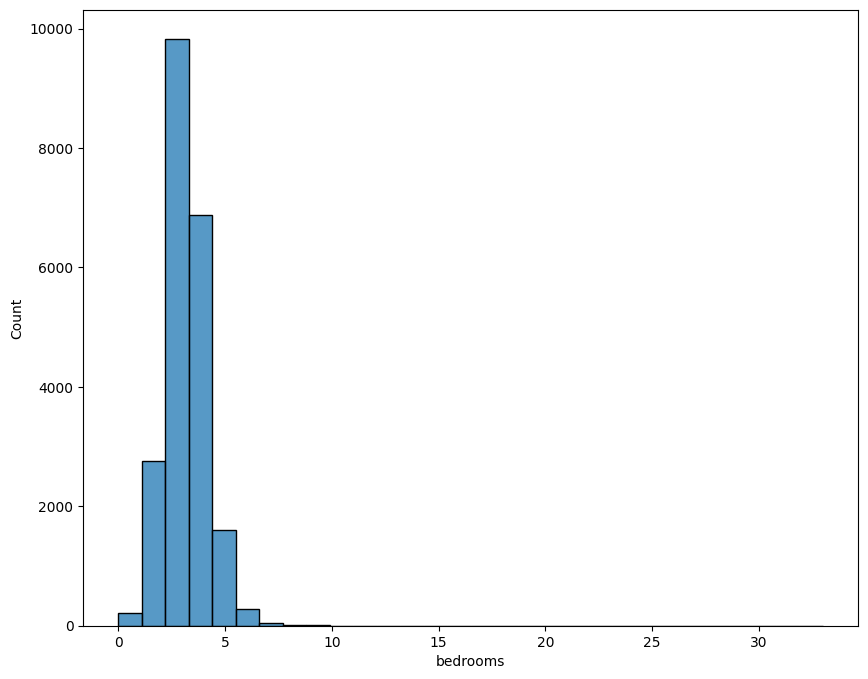

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df["bedrooms"].dropna(), kde=False, bins=30)

**Distribución de baños**

<Axes: xlabel='bathrooms', ylabel='Count'>

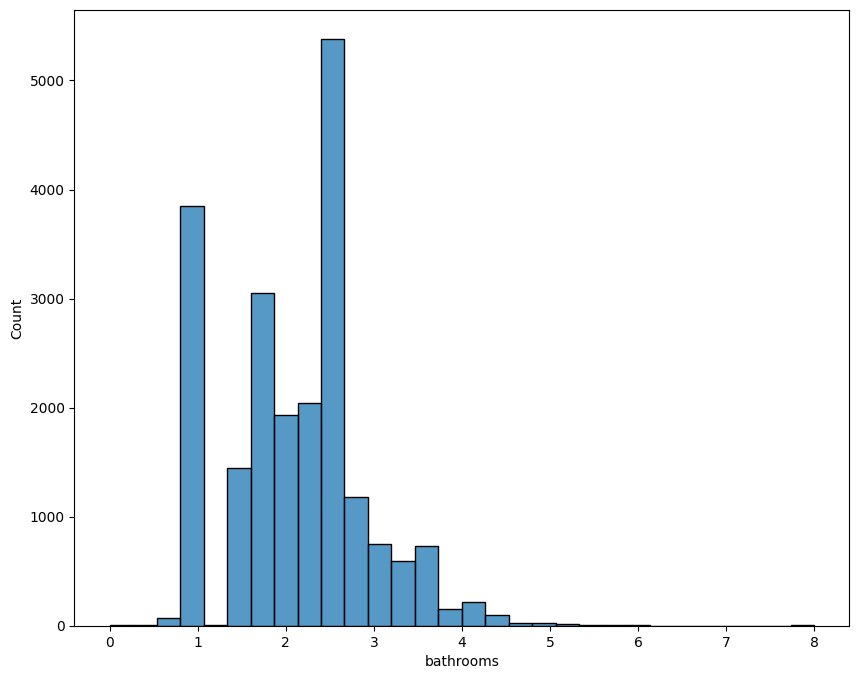

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['bathrooms'].dropna(), kde=False, bins=30)

**Distribución de pisos**

<Axes: xlabel='floors', ylabel='Count'>

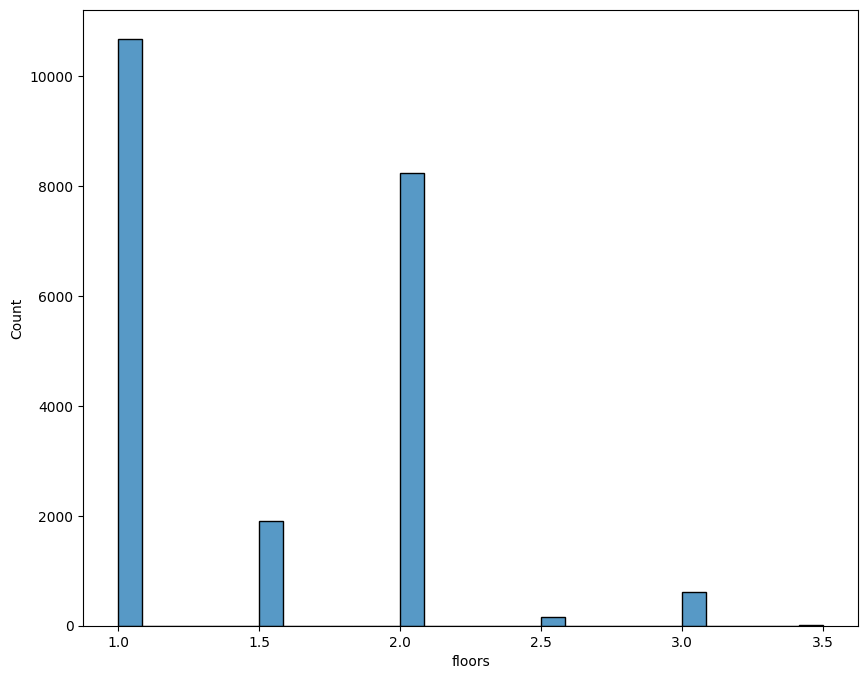

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['floors'].dropna(), kde=False, bins=30)

**Distribución de areas**

<Axes: xlabel='sqft_living', ylabel='Count'>

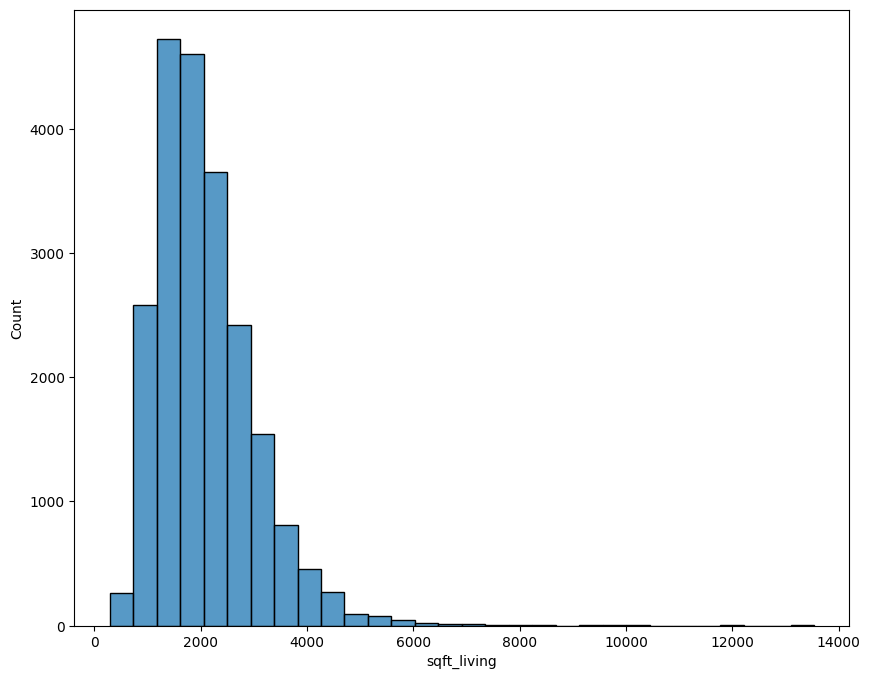

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['sqft_living'].dropna(), kde=False, bins=30)

# **Aprendizaje supervisado**

## **Normalizar datos**

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
col_name = df.drop('price', axis = 1).columns[:]
x = df.loc[:, col_name]
y = df['price']

x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

x

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0      0.090909    0.12500     0.067170  0.003108     0.0         0.0   0.0   
1      0.090909    0.28125     0.172075  0.004072     0.4         0.0   0.0   
2      0.060606    0.12500     0.036226  0.005743     0.0         0.0   0.0   
3      0.121212    0.37500     0.126038  0.002714     0.0         0.0   0.0   
4      0.090909    0.25000     0.104906  0.004579     0.0         0.0   0.0   
...         ...        ...          ...       ...     ...         ...   ...   
21608  0.090909    0.31250     0.093585  0.000370     0.8         0.0   0.0   
21609  0.121212    0.31250     0.152453  0.003206     0.4         0.0   0.0   
21610  0.060606    0.09375     0.055094  0.000503     0.4         0.0   0.0   
21611  0.090909    0.31250     0.098868  0.001132     0.4         0.0   0.0   
21612  0.060606    0.09375     0.055094  0.000337     0.4         0.0   0.0   

       condition     grade  sqft_basement  yr_built  yr_renovated       lat  \
0            0.5  0.500000       0.000000  0.478261      0.000000  0.571498   
1            0.5  0.500000       0.082988  0.443478      0.988089  0.908959   
2            0.5  0.416667       0.000000  0.286957      0.000000  0.936143   
3            1.0  0.500000       0.188797  0.565217      0.000000  0.586939   
4            0.5  0.583333       0.000000  0.756522      0.000000  0.741354   
...          ...       ...            ...       ...           ...       ...   
21608        0.5  0.583333       0.000000  0.947826      0.000000  0.874055   
21609        0.5  0.583333       0.000000  0.991304      0.000000  0.570693   
21610        0.5  0.500000       0.000000  0.947826      0.000000  0.705324   
21611        0.5  0.583333       0.000000  0.904348      0.000000  0.608975   
21612        0.5  0.500000       0.000000  0.939130      0.000000  0.704842   

           long     month  year  
0      0.217608  0.818182   0.0  
1      0.166113  1.000000   0.0  
2      0.237542  0.090909   1.0  
3      0.104651  1.000000   0.0  
4      0.393688  0.090909   1.0  
...         ...       ...   ...  
21608  0.143688  0.363636   0.0  
21609  0.130399  0.090909   1.0  
21610  0.182724  0.454545   0.0  
21611  0.373754  0.000000   1.0  
21612  0.182724  0.818182   0.0  

[21613 rows x 16 columns]

**Dividir los datos en conjuntos de entrenamiento y prueba**

In [ ]:
X = df.drop('price', axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)#, random_state=5)
print("Train x shape : ", X_train.shape)
print("Train y shape : ", y_train.shape)
print("Test x shape : ", X_test.shape)
print("Test y shape : ", y_test.shape)

Train x shape :  (17290, 16)
Train y shape :  (17290,)
Test x shape :  (4323, 16)
Test y shape :  (4323,)


## **Consturcción del modelo**

### **Regresión lineal**

In [ ]:
modelLinear = LinearRegression()
modelLinear.fit(X_train, y_train)

LinearRegression()

### **Regresión de árbol de decisión**

In [ ]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)
tree_pred = tree_regressor.predict(X_test)

### **Regresión de bosques aleatorios**

In [ ]:
forest_regressor = RandomForestRegressor()
forest_regressor.fit(X_train, y_train)
forest_pred = forest_regressor.predict(X_test)

## **Interpretación del modelo**

### **Regresion lineal**

In [ ]:
print("Intercepción del Model: ", modelLinear.intercept_, "\n")
print("Coeficiente del Modelo: ", modelLinear.coef_, "\n")

for i in range(len(X.columns)):
  print(X.columns[i], ": ", modelLinear.coef_[i])

Intercepción del Model:  96546.41748665343 

Coeficiente del Modelo:  [-1.63089245e+06  1.18277637e+05  3.93840345e+06 -2.51183543e+03
  7.32415520e+05  1.05298767e+05] 

bedrooms :  -1630892.4533872358
bathrooms :  118277.63701708824
sqft_living :  3938403.453317591
floors :  -2511.835426319883
waterfront :  732415.5196279922
zipcode :  105298.76683666412


In [ ]:
y_pred = modelLinear.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = y_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price     Predicted     Difference
20091   417838.0  6.203097e+05  202471.665536
18101  1680000.0  1.275605e+06 -404394.633731
16071   340000.0  4.968966e+05  156896.562478
15011   915000.0  8.396921e+05  -75307.901585
6578    500000.0  2.943468e+05 -205653.211957
19181   500000.0  7.926595e+05  292659.524074
21005   388598.0  6.221726e+05  233574.569535
1038    380000.0  4.627735e+05   82773.527403
8695    410000.0  6.292268e+05  219226.805430
2376    175000.0  3.126995e+05  137699.531683 

Model testing performance:
--------------------------
RMSE is 253689.79276222325
R2 score is 0.5466030567127589


In [ ]:
print("\nRegresión lineal:")
print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Regresión lineal:
Mean Squared Error: 253689.79276222325
Coefficient of determination: 0.55


Text(0, 0.5, 'Precio estimado')

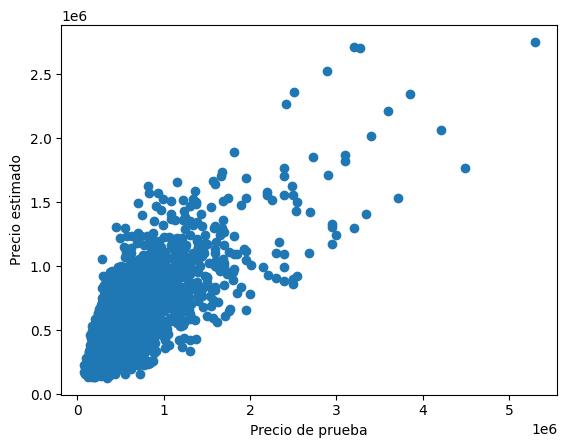

In [ ]:
plt.scatter(y_test, y_pred)

plt.xlabel('Precio de prueba')
plt.ylabel('Precio estimado')

### **Regresión de árbol de decisión**

In [ ]:
print("\nRegresión de árbol de decisión:")
print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, tree_pred)))
print('Coefficient of determination: ', r2_score(y_test, tree_pred))


Regresión de árbol de decisión:
Mean Squared Error: 212110.0875138646
Coefficient of determination:  0.662115640101899


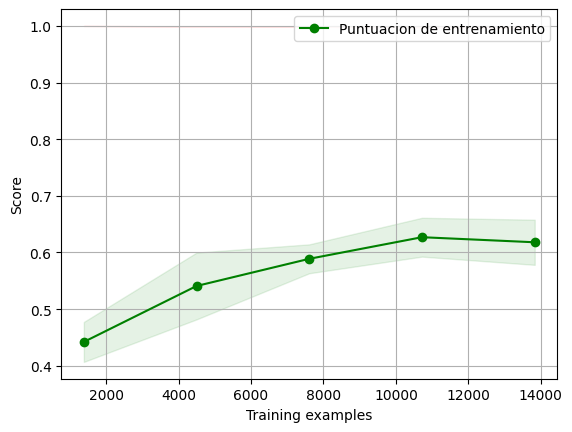

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes=np.linspace(.1, 1.0, 5)

plt.figure()
plt.title('')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(
    tree_regressor, X_train, y_train, cv=5, n_jobs=1, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1,
                  color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
#plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#          label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
          label="Puntuacion de entrenamiento")

plt.legend(loc="best")
plt.show()

In [ ]:
X_train

bedrooms  bathrooms  sqft_living  floors  waterfront   zipcode
20194  0.121212    0.31250     0.176604     0.4         0.0  0.207071
2990   0.151515    0.21875     0.162264     0.2         0.0  0.732323
3855   0.090909    0.28125     0.101132     0.0         0.0  0.732323
11058  0.121212    0.31250     0.093585     0.2         0.0  0.722222
15764  0.090909    0.21875     0.234717     0.0         0.0  0.525253
...         ...        ...          ...     ...         ...       ...
16245  0.090909    0.21875     0.082264     0.2         0.0  0.611111
4940   0.121212    0.21875     0.120000     0.0         0.0  0.111111
19546  0.060606    0.12500     0.064906     0.0         0.0  0.575758
5889   0.060606    0.12500     0.083019     0.0         0.0  0.590909
12552  0.060606    0.21875     0.065660     0.0         0.0  0.530303

[17290 rows x 6 columns]

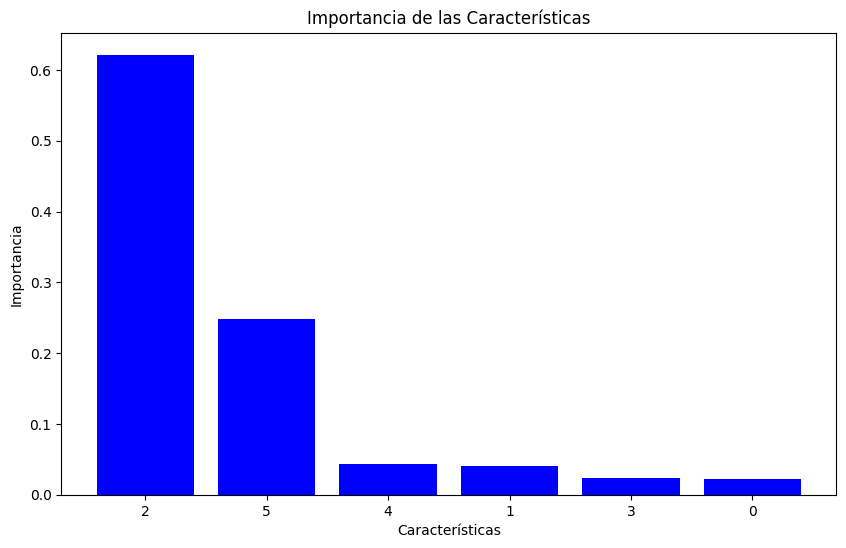

In [ ]:
# Obtener la importancia de las características
importances = tree_regressor.feature_importances_

# Ordenar las importancias de las características de mayor a menor
indices = np.argsort(importances)[::-1]

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()

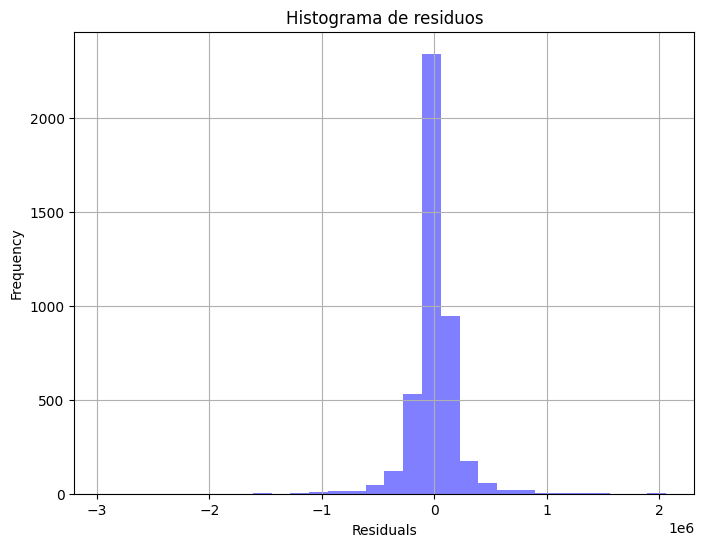

In [ ]:
# Obtener los residuos
residuals = y_test - tree_pred

# Crear el histograma de residuos
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histograma de residuos')
plt.grid(True)
plt.show()


Text(0, 0.5, 'Precio estimado')

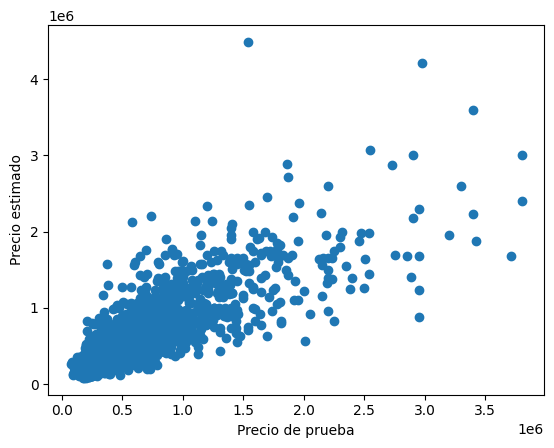

In [ ]:
plt.scatter(y_test, tree_pred)
plt.xlabel('Precio de prueba')
plt.ylabel('Precio estimado')

### **Regresión de bosques aleatorios**

In [ ]:
print("\nRegresión de bosques aleatorios:")
print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, forest_pred)))
print('Coefficient of determination: ', r2_score(y_test, forest_pred))


Regresión de bosques aleatorios:
Mean Squared Error: 168968.5970552947
Coefficient of determination:  0.8087113586134159


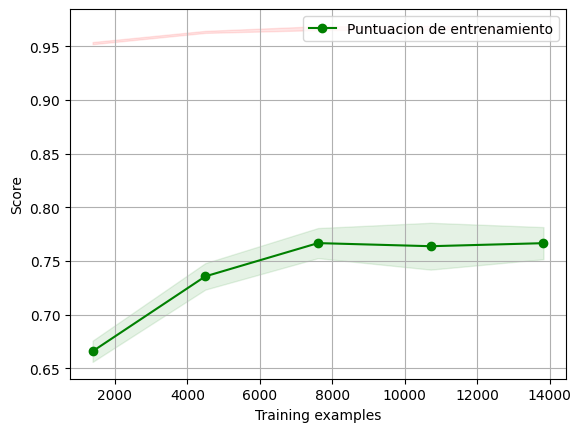

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes=np.linspace(.1, 1.0, 5)

plt.figure()
plt.title('')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(
    forest_regressor, X_train, y_train, cv=5, n_jobs=1, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1,
                  color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
#plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#          label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
          label="Puntuacion de entrenamiento")

plt.legend(loc="best")
plt.show()

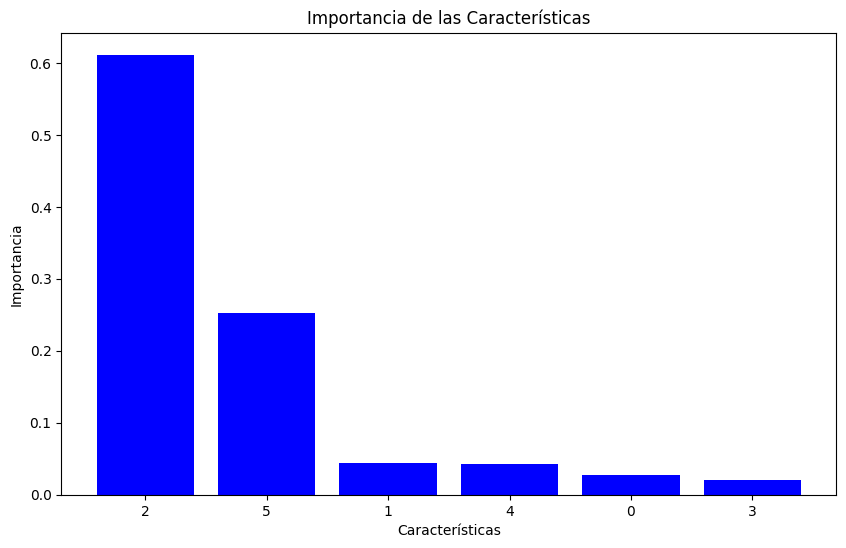

In [ ]:
# Obtener la importancia de las características
importances = forest_regressor.feature_importances_

# Ordenar las importancias de las características de mayor a menor
indices = np.argsort(importances)[::-1]

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()

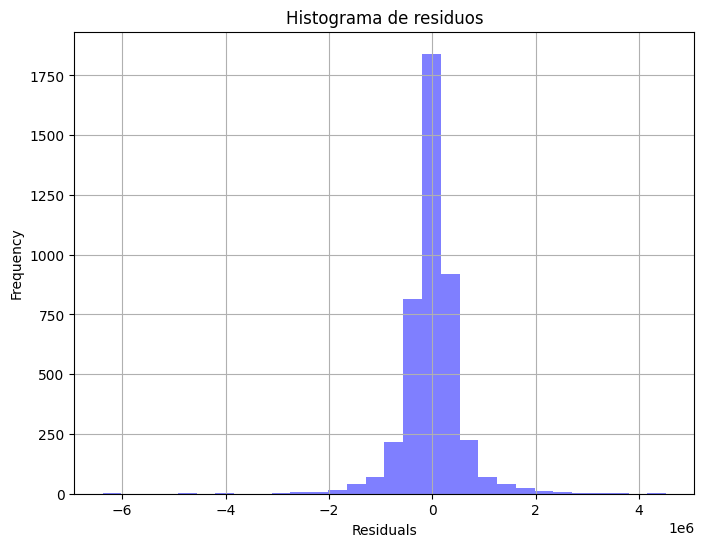

In [ ]:
# Obtener los residuos
residuals = y_test - tree_pred

# Crear el histograma de residuos
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histograma de residuos')
plt.grid(True)
plt.show()

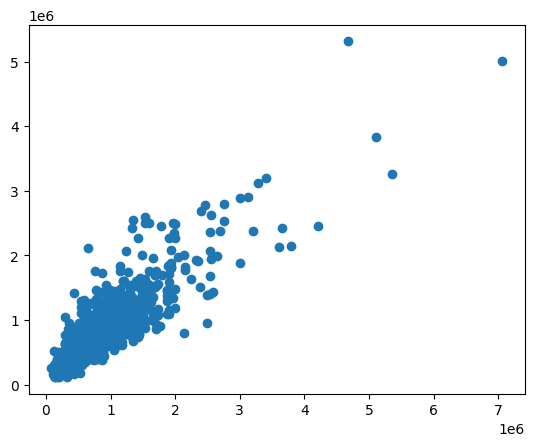

In [ ]:
plt.scatter(y_test, forest_pred)

# **Iteracion de los datos**

In [ ]:
X = df.drop('price', axis = 1)
y = df['price']

## **Regresión lineal**

In [ ]:
# Se itera varias veces la regresión lineal y se almacenan los resultados
rmse_list_lineal = []
r2_list_lineal = []
y_pred_list_lineal = []
datosIteracion_lineal = {}
y_test_list_lineal = []

num_iterations = 100  # Número de iteraciones a realizar
porcentajes = [0.2]#[0.2, 0.3, 0.5, 0.7, 0.8] # Porcentajes de datos de enteenamiento a iterar

# X = df.drop('price', axis=1)
# y = df['price']

for j in porcentajes:
  rmse_list_lineal = []
  r2_list_lineal = []
  y_pred_list_lineal = []
  y_test_list_lineal = []

  for i in range(num_iterations):
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=j)

      modelLinear = LinearRegression()
      modelLinear.fit(X_train, y_train)

      y_pred = modelLinear.predict(X_test)
      rmse = np.sqrt(mean_squared_error(y_test, y_pred))
      r2 = r2_score(y_test, y_pred)

      rmse_list_lineal.append(rmse)
      r2_list_lineal.append(r2)
      y_pred_list_lineal.append(y_pred)
      y_test_list_lineal.append(y_test)

  datosIteracion_lineal[str(j)] = {'y_pred_list': y_pred_list_lineal, 'y_test_list': y_test_list_lineal, 'rmse_list': rmse_list_lineal, 'r2_list': r2_list_lineal}

In [ ]:
# Se muestran los resultados
for i in datosIteracion_lineal.keys():
  print("Porcentaje de datos de entrenamiento: " + i)
  # Se imprime la lista de resultados de RMSE y R2
  print("Lista de resultados de RMSE:", datosIteracion_lineal[i]["rmse_list"])
  print("Lista de resultados de R2:", datosIteracion_lineal[i]["r2_list"])

  # La media y la desviación estándar
  print("Media de RMSE:", np.mean(datosIteracion_lineal[i]["rmse_list"]))
  print("Desviación estándar de RMSE:", np.std(datosIteracion_lineal[i]["rmse_list"]))
  print("Media de R2:", np.mean(datosIteracion_lineal[i]["r2_list"]))
  print("Desviación estándar de R2:", np.std(datosIteracion_lineal[i]["r2_list"]))

  print("\n\n")

Porcentaje de datos de entrenamiento: 0.2
Lista de resultados de RMSE: [253170.82616221387, 245264.98697224807, 247316.68628216715, 238676.1686227968, 253054.08284686718, 241458.939435157, 244556.7529924691, 259411.29606087852, 244397.05019668132, 257904.47423911796, 236017.5603398065, 251982.99513799665, 243577.2554202914, 256367.69054045333, 242780.76469606507, 235040.86409201138, 260441.842723488, 246081.52939169027, 256512.82397712086, 248846.45993356899, 249721.59735448728, 247125.34638974603, 257669.03232904532, 242970.52530782335, 249123.81338015, 260084.5145680572, 260040.77394563885, 248549.3573020482, 239937.90578195397, 244987.34840525012, 252393.9477670596, 245681.686806503, 241050.76654014643, 255792.34624670306, 244079.96153714982, 245489.81379342175, 250745.01675781715, 252985.32396790586, 242323.58946939535, 257286.98092620022, 241165.12355390837, 239959.85310550014, 248494.24791078534, 241684.85967756758, 243142.76266087705, 252990.4550460897, 249375.5899200227, 245113

## **Regresión arbol de decision**

In [ ]:
# Se itera varias veces la regresión lineal y se almacenan los resultados
rmse_lis_arbol = []
r2_list_arbol = []
y_pred_list_arbol = []
datosIteracion_arbol = {}
y_test_list_arbol = []

num_iterations = 100  # Número de iteraciones a realizar
porcentajes = [0.2]#, 0.3, 0.5, 0.7, 0.8] # Porcentajes de datos de enteenamiento a iterar

# X = df.drop('price', axis=1)
# y = df['price']

for j in porcentajes:
  rmse_list_arbol = []
  r2_list_arbol = []
  y_pred_list_arbol = []
  y_test_list_arbol = []

  for i in range(num_iterations):
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=j)

      tree_regressor = DecisionTreeRegressor()
      tree_regressor.fit(X_train, y_train)
      tree_pred = tree_regressor.predict(X_test)

      rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
      r2 = r2_score(y_test, tree_pred)

      rmse_list_arbol.append(rmse)
      r2_list_arbol.append(r2)
      y_pred_list_arbol.append(tree_pred)
      y_test_list_arbol.append(y_test)

  datosIteracion_arbol[str(j)] = {'y_pred_list': y_pred_list_arbol, 'y_test_list': y_test_list_arbol, 'rmse_list': rmse_list_arbol, 'r2_list': r2_list_arbol}

In [ ]:
# Se muestran los resultados
for i in datosIteracion_arbol.keys():
  print("Porcentaje de datos de entrenamiento: " + i)
  # Se imprime la lista de resultados de RMSE y R2
  print("Lista de resultados de RMSE:", datosIteracion_arbol[i]["rmse_list"])
  print("Lista de resultados de R2:", datosIteracion_arbol[i]["r2_list"])

  # La media y la desviación estándar
  print("Media de RMSE:", np.mean(datosIteracion_arbol[i]["rmse_list"]))
  print("Desviación estándar de RMSE:", np.std(datosIteracion_arbol[i]["rmse_list"]))
  print("Media de R2:", np.mean(datosIteracion_arbol[i]["r2_list"]))
  print("Desviación estándar de R2:", np.std(datosIteracion_arbol[i]["r2_list"]))

  print("\n\n")

Porcentaje de datos de entrenamiento: 0.2
Lista de resultados de RMSE: [204352.3423513193, 238468.66145600996, 216789.45032367882, 205866.11188910814, 216834.56354284126, 233097.51444102352, 209671.51292163812, 234357.86312602425, 232164.40248266543, 236963.13113392284, 199311.03568778816, 216697.71755622645, 204042.64078265755, 214159.63316332348, 224268.05838434803, 239512.17785517537, 218486.54907187246, 200106.8513728258, 247145.340700691, 215733.61669076505, 222735.86330553875, 209211.86952522356, 212791.67022430105, 216401.13736225135, 219576.10664880063, 233662.5310780467, 213796.046975746, 231805.00289858863, 209857.27205905452, 222223.00915736108, 230061.64784972064, 204437.33248929837, 219632.63718300458, 229709.33107655405, 228261.1186116868, 231991.84296624732, 230005.34383762846, 243780.5679834123, 229700.7332008803, 231098.39056150417, 208625.69985571815, 220054.10255359672, 215239.3162586996, 225514.40298391454, 242222.58178431072, 223448.84800266437, 203860.1523109772, 

## **Regresión de bosques aleatorios**

In [ ]:
# Se itera varias veces la regresión lineal y se almacenan los resultados
rmse_list_bosque = []
r2_list_bosque = []
y_pred_list_bosque = []
y_test_list_bosque = []
datosIteracion_bosque = {}

num_iterations = 100#1000  # Número de iteraciones a realizar
porcentajes = [0.2]#, 0.3, 0.5, 0.7, 0.8] # Porcentajes de datos de enteenamiento a iterar

# X = df.drop('price', axis=1)
# y = df['price']

for j in porcentajes:
  rmse_list_bosque = []
  r2_list_bosque = []
  y_pred_list_bosque = []
  y_test_list_bosque = []

  for i in range(num_iterations):
      print(i)
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=j)

      forest_regressor = RandomForestRegressor()
      forest_regressor.fit(X_train, y_train)
      forest_pred = forest_regressor.predict(X_test)

      rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
      r2 = r2_score(y_test, forest_pred)

      rmse_list_bosque.append(rmse)
      r2_list_bosque.append(r2)
      y_pred_list_bosque.append(forest_pred)
      y_test_list_bosque.append(y_test)

  datosIteracion_bosque[str(j)] = {'y_pred_list': y_pred_list_bosque, 'y_test_list': y_test_list_bosque, 'rmse_list': rmse_list_bosque, 'r2_list': r2_list_bosque}

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
# Se muestran los resultados
for i in datosIteracion_bosque.keys():
  print("Porcentaje de datos de entrenamiento: " + i)
  # Se imprime la lista de resultados de RMSE y R2
  print("Lista de resultados de RMSE:", datosIteracion_bosque[i]["rmse_list"])
  print("Lista de resultados de R2:", datosIteracion_bosque[i]["r2_list"])

  # La media y la desviación estándar
  print("Media de RMSE:", np.mean(datosIteracion_bosque[i]["rmse_list"]))
  print("Desviación estándar de RMSE:", np.std(datosIteracion_bosque[i]["rmse_list"]))
  print("Media de R2:", np.mean(datosIteracion_bosque[i]["r2_list"]))
  print("Desviación estándar de R2:", np.std(datosIteracion_bosque[i]["r2_list"]))

  print("\n\n")

Porcentaje de datos de entrenamiento: 0.2
Lista de resultados de RMSE: [181274.57830385875, 153381.01055405356, 157270.23890098243, 155140.6904858667, 160212.0692456461, 167785.48303360154, 160506.8554672189, 167044.21297562035, 172220.92251600267, 163570.51366026406, 167725.89657924592, 165623.34334816734, 157469.365482536, 163874.74135903938, 169295.8232013938, 183777.08227353712, 157101.49909902344, 167261.7416044049, 154004.62580567988, 175045.25570764835, 160368.1479859918, 163241.5669710184, 161436.93791270588, 176397.55148685336, 182002.01340529113, 166158.79085361867, 189118.425606454, 166558.5365447024, 166176.50323695468, 176592.78057283754, 162870.18501066146, 171020.25665583066, 183418.1858105124, 177120.547639655, 172059.61252847654, 178680.73268070442, 170498.86385904113, 163182.1175007864, 173123.36104525096, 176969.9158877308, 181917.37644567247, 171385.6927015989, 176399.63782674345, 182801.98945509482, 181962.80285414268, 156086.65676598245, 166205.10080995975, 161692

In [ ]:
print("Porcentaje de datos de entrenamiento: 0.2")
# Se imprime la lista de resultados de RMSE y R2
print("Lista de resultados de RMSE:", rmse_list_bosque)
print("Lista de resultados de R2:", r2_list_bosque)

# La media y la desviación estándar
print("Media de RMSE:", np.mean(rmse_list_bosque))
print("Desviación estándar de RMSE:", np.std(rmse_list_bosque))
print("Media de R2:", np.mean(r2_list_bosque))
print("Desviación estándar de R2:", np.std(r2_list_bosque))

Porcentaje de datos de entrenamiento: 0.2
Lista de resultados de RMSE: [171294.80025923034, 170671.70182027493, 163135.60272785317, 161082.53646823094, 167861.40502368886, 174534.90239115088, 168112.15334932366, 167850.37556726005, 158600.44925625392, 155646.30891306742, 163086.34976964045, 166928.43388229833, 180328.4722638568, 157455.9203188843, 164271.47292207187, 159256.85537522318, 169003.5468690951, 157480.98542942136, 148511.74981278597, 165924.31568511692, 163879.8238892147, 153649.1737009973, 157103.34422737922, 164700.63067666514, 161082.71933859983, 160684.99362578703, 161148.11499600863, 162756.39160869163, 164307.87069241088, 162877.31593592514, 164531.9553821934, 166047.57219945677, 180021.21245733358, 161428.43683734938, 164866.16434659017, 166025.2719270962, 153711.556560844, 166765.8667191812, 158568.5837952289, 159491.04162346927, 155306.89368062434, 167587.59974333865, 172346.76266241173, 179292.50748278567, 175823.06419456858, 164459.95397687587, 155453.6007513627, 

## **Graficas aleatorias de los resultados**

### **Valores aleatorios**

In [ ]:
import random

# Definir la cantidad de valores aleatorios a generar
cantidad_valores = 6

# Generar una lista de valores aleatorios entre 0 y 1000
valores_aleatorios = [random.randint(0, 99) for _ in range(cantidad_valores)]

# Imprimir la lista de valores aleatorios
print("Valores aleatorios:", valores_aleatorios)

Valores aleatorios: [58, 54, 98, 88, 83, 29]


### **Regresion lineal**

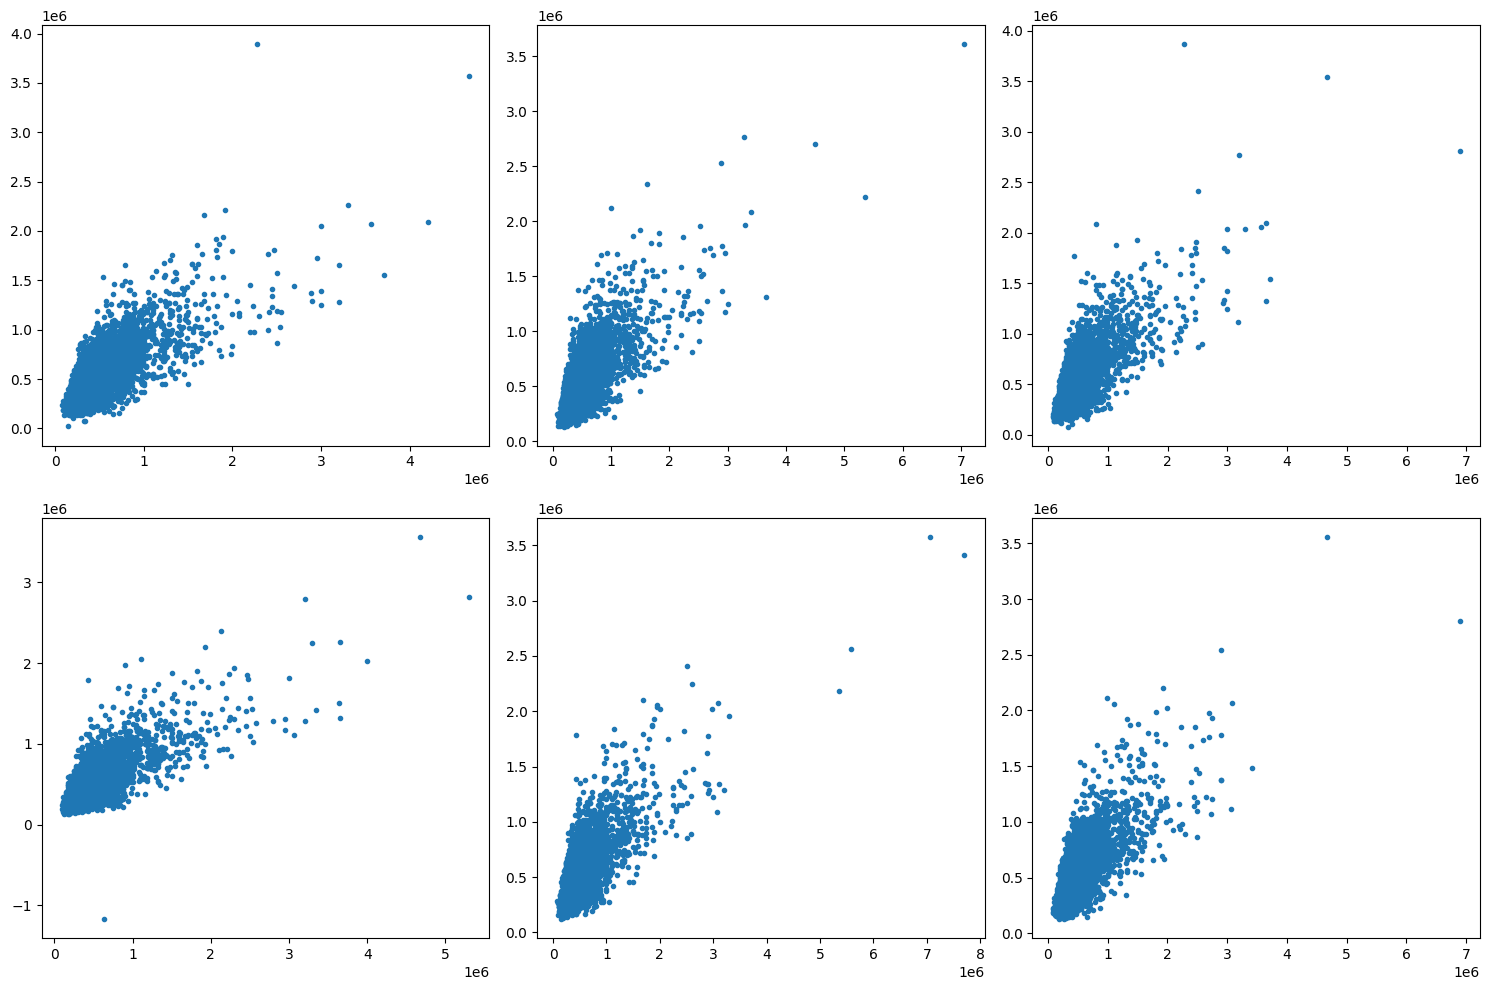

In [ ]:
porcentaje = str(porcentajes[0])

datos_graficar_y = datosIteracion_lineal[porcentaje]['y_pred_list']
datos_graficar_x = datosIteracion_lineal[porcentaje]['y_test_list']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot(datos_graficar_x[valores_aleatorios[0]], datos_graficar_y[valores_aleatorios[0]], '.')
axes[0, 1].plot(datos_graficar_x[valores_aleatorios[1]], datos_graficar_y[valores_aleatorios[1]], '.')
axes[0, 2].plot(datos_graficar_x[valores_aleatorios[2]], datos_graficar_y[valores_aleatorios[2]], '.')
axes[1, 0].plot(datos_graficar_x[valores_aleatorios[3]], datos_graficar_y[valores_aleatorios[3]], '.')
axes[1, 1].plot(datos_graficar_x[valores_aleatorios[4]], datos_graficar_y[valores_aleatorios[4]], '.')
axes[1, 2].plot(datos_graficar_x[valores_aleatorios[5]], datos_graficar_y[valores_aleatorios[5]], '.')

plt.tight_layout()
plt.show()

AttributeError: 'list' object has no attribute 'plot'

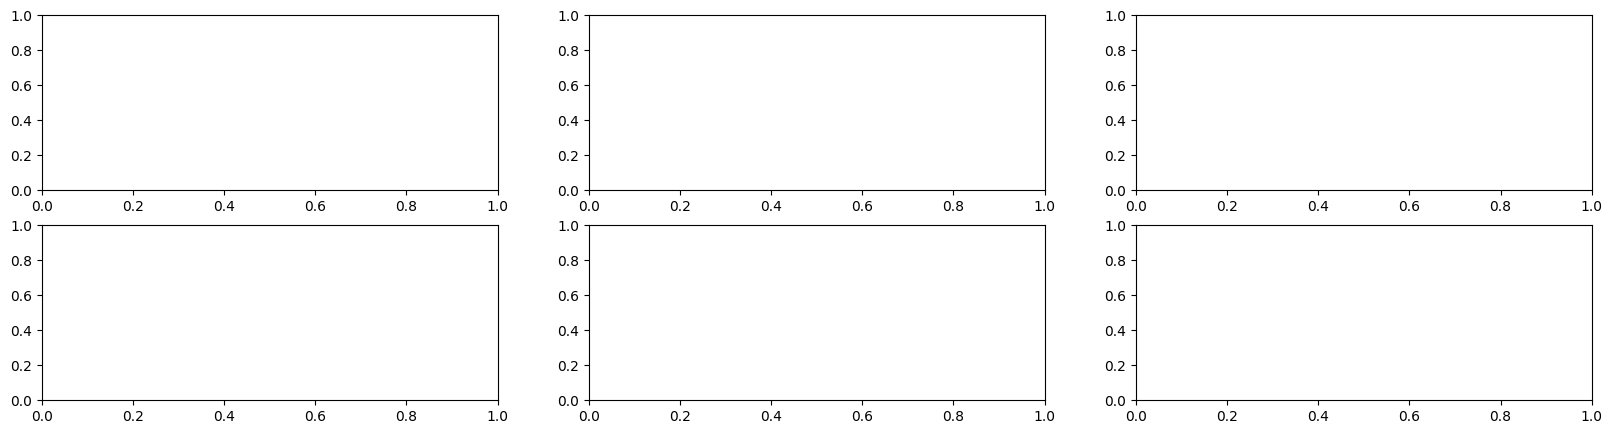

In [ ]:
porcentaje = str(porcentajes[0])

datos_graficar_y = datosIteracion_lineal[porcentaje]['y_pred_list']
datos_graficar_x = datosIteracion_lineal[porcentaje]['y_test_list']

fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 5))
sns.regplot(y = datos_graficar_y[valores_aleatorios[0]], x = datos_graficar_x[valores_aleatorios[0]], ax = axs[0])
sns.regplot(y = datos_graficar_y[valores_aleatorios[1]], x = datos_graficar_x[valores_aleatorios[1]], ax = axs[1])
sns.regplot(y = datos_graficar_y[valores_aleatorios[2]], x = datos_graficar_x[valores_aleatorios[2]], ax = axs[2])
sns.regplot(y = datos_graficar_y[valores_aleatorios[3]], x = datos_graficar_x[valores_aleatorios[3]], ax = axs[3])
sns.regplot(y = datos_graficar_y[valores_aleatorios[4]], x = datos_graficar_x[valores_aleatorios[4]], ax = axs[4])
sns.regplot(y = datos_graficar_y[valores_aleatorios[5]], x = datos_graficar_x[valores_aleatorios[5]], ax = axs[5])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[3]], x = datos_graficar_x[valores_aleatorios[3]], ax = axs[1, 0])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[4]], x = datos_graficar_x[valores_aleatorios[4]], ax = axs[1, 1])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[5]], x = datos_graficar_x[valores_aleatorios[5]], ax = axs[1, 2])
plt.tight_layout()

In [ ]:
rmse_mean_linear_regression = []
rmse_std_linear_regression = []
r2_mean_linear_regression = []
r2_std_linear_regression = []


for i in porcentajes:
  rmse_mean_linear_regression.append(np.mean(datosIteracion_lineal[str(i)]["rmse_list"]))
  rmse_std_linear_regression.append(np.std(datosIteracion_lineal[str(i)]["rmse_list"]))
  r2_mean_linear_regression.append(np.mean(datosIteracion_lineal[str(i)]["r2_list"]))
  r2_std_linear_regression.append(np.std(datosIteracion_lineal[str(i)]["r2_list"]))

# Graficar RMSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(porcentajes, rmse_mean_linear_regression, yerr=rmse_std_linear_regression, label='Regresión lineal', marker='o') #.plot(porcentajes, rmse_mean_linear_regression, marker='o', label='Regresión lineal', linewidth=2, markersize=12)
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('RMSE')
plt.title('Media y desviación estándar de RMSE vs Porcentaje de datos de prueba')
plt.legend()

# Graficar R2
plt.subplot(1, 2, 2)
plt.errorbar(porcentajes, r2_mean_linear_regression, yerr=r2_std_linear_regression, label='Regresión lineal', marker='o')
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('R2')
plt.title('Media y desviación estándar de R2 vs Porcentaje de datos de prueba')
plt.legend()

plt.tight_layout()
plt.show()

### **Regresion arboles de decisión**

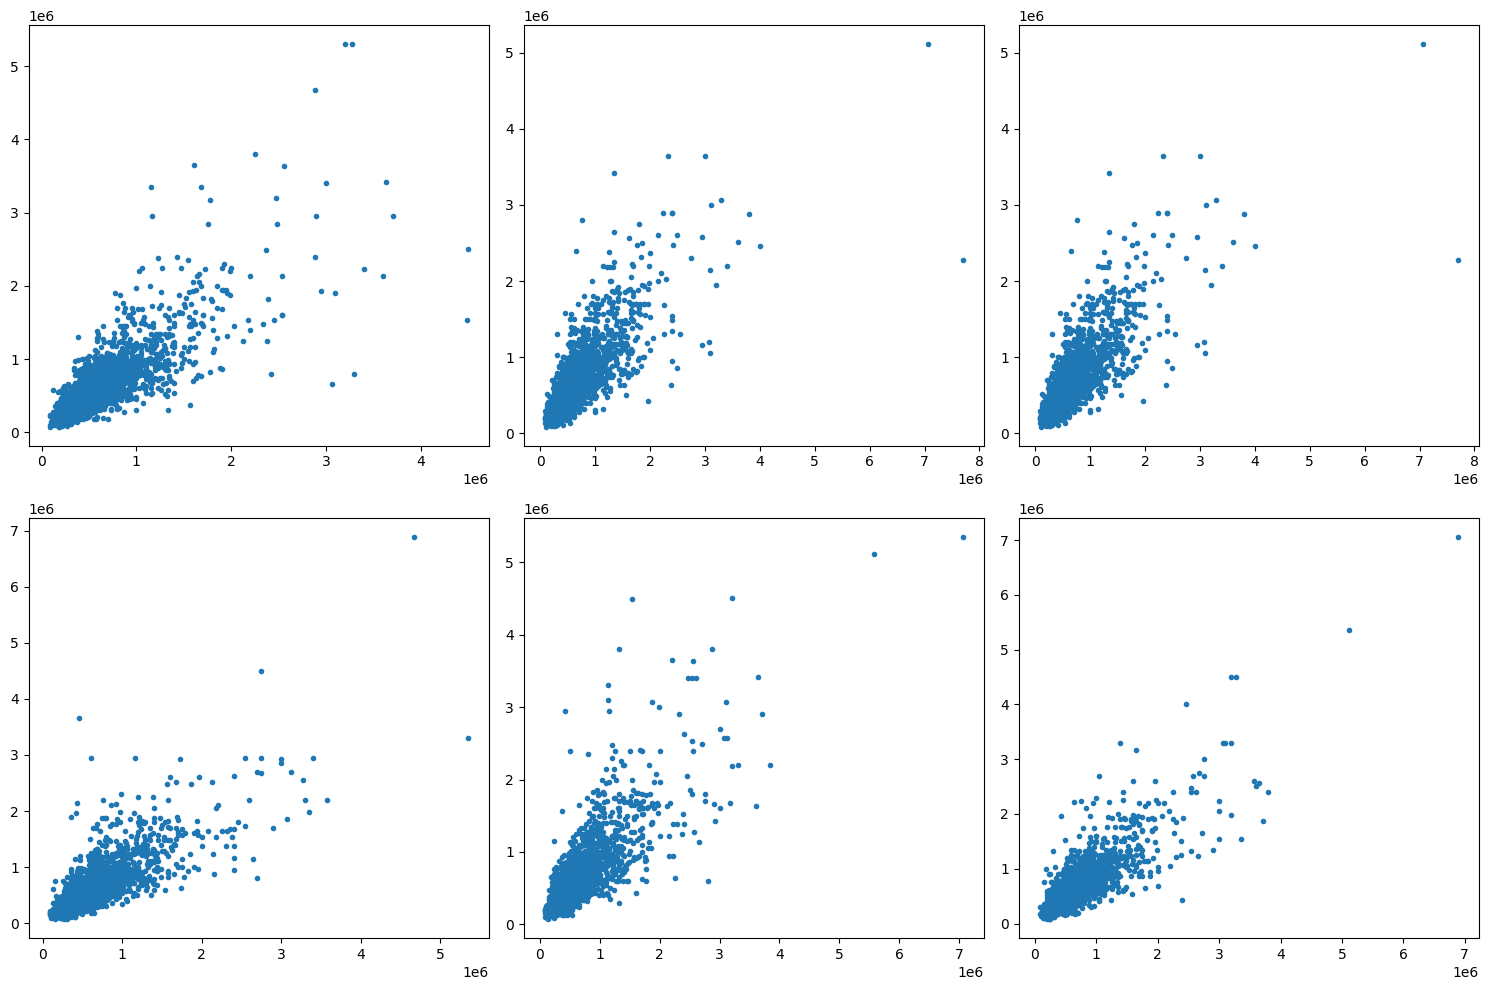

In [ ]:
porcentaje = str(porcentajes[0])

datos_graficar_y = datosIteracion_arbol[porcentaje]['y_pred_list']
datos_graficar_x = datosIteracion_arbol[porcentaje]['y_test_list']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot(datos_graficar_x[valores_aleatorios[0]], datos_graficar_y[valores_aleatorios[0]], '.')
axes[0, 1].plot(datos_graficar_x[valores_aleatorios[1]], datos_graficar_y[valores_aleatorios[1]], '.')
axes[0, 2].plot(datos_graficar_x[valores_aleatorios[2]], datos_graficar_y[valores_aleatorios[2]], '.')
axes[1, 0].plot(datos_graficar_x[valores_aleatorios[3]], datos_graficar_y[valores_aleatorios[3]], '.')
axes[1, 1].plot(datos_graficar_x[valores_aleatorios[4]], datos_graficar_y[valores_aleatorios[4]], '.')
axes[1, 2].plot(datos_graficar_x[valores_aleatorios[5]], datos_graficar_y[valores_aleatorios[5]], '.')
plt.tight_layout()

In [ ]:
rmse_mean_arbol_regression = []
rmse_std_arbol_regression = []
r2_mean_arbol_regression = []
r2_std_arbol_regression = []


for i in porcentajes:
  rmse_mean_arbol_regression.append(np.mean(datosIteracion_arbol[str(i)]["rmse_list"]))
  rmse_std_arbol_regression.append(np.std(datosIteracion_arbol[str(i)]["rmse_list"]))
  r2_mean_arbol_regression.append(np.mean(datosIteracion_arbol[str(i)]["r2_list"]))
  r2_std_arbol_regression.append(np.std(datosIteracion_arbol[str(i)]["r2_list"]))

# Graficar RMSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(porcentajes, rmse_mean_arbol_regression, yerr=rmse_std_arbol_regression, label='Regresión Arbol de decisión', marker='o') #.plot(porcentajes, rmse_mean_linear_regression, marker='o', label='Regresión lineal', linewidth=2, markersize=12)
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('RMSE')
plt.title('Media y desviación estándar de RMSE vs Porcentaje de datos de prueba')
plt.legend()

# Graficar R2
plt.subplot(1, 2, 2)
plt.errorbar(porcentajes, r2_mean_arbol_regression, yerr=r2_std_arbol_regression, label='Regresión Arbol de decisión', marker='o')
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('R2')
plt.title('Media y desviación estándar de R2 vs Porcentaje de datos de prueba')
plt.legend()

plt.tight_layout()
plt.show()

### **Regresion bosques aleatorios**

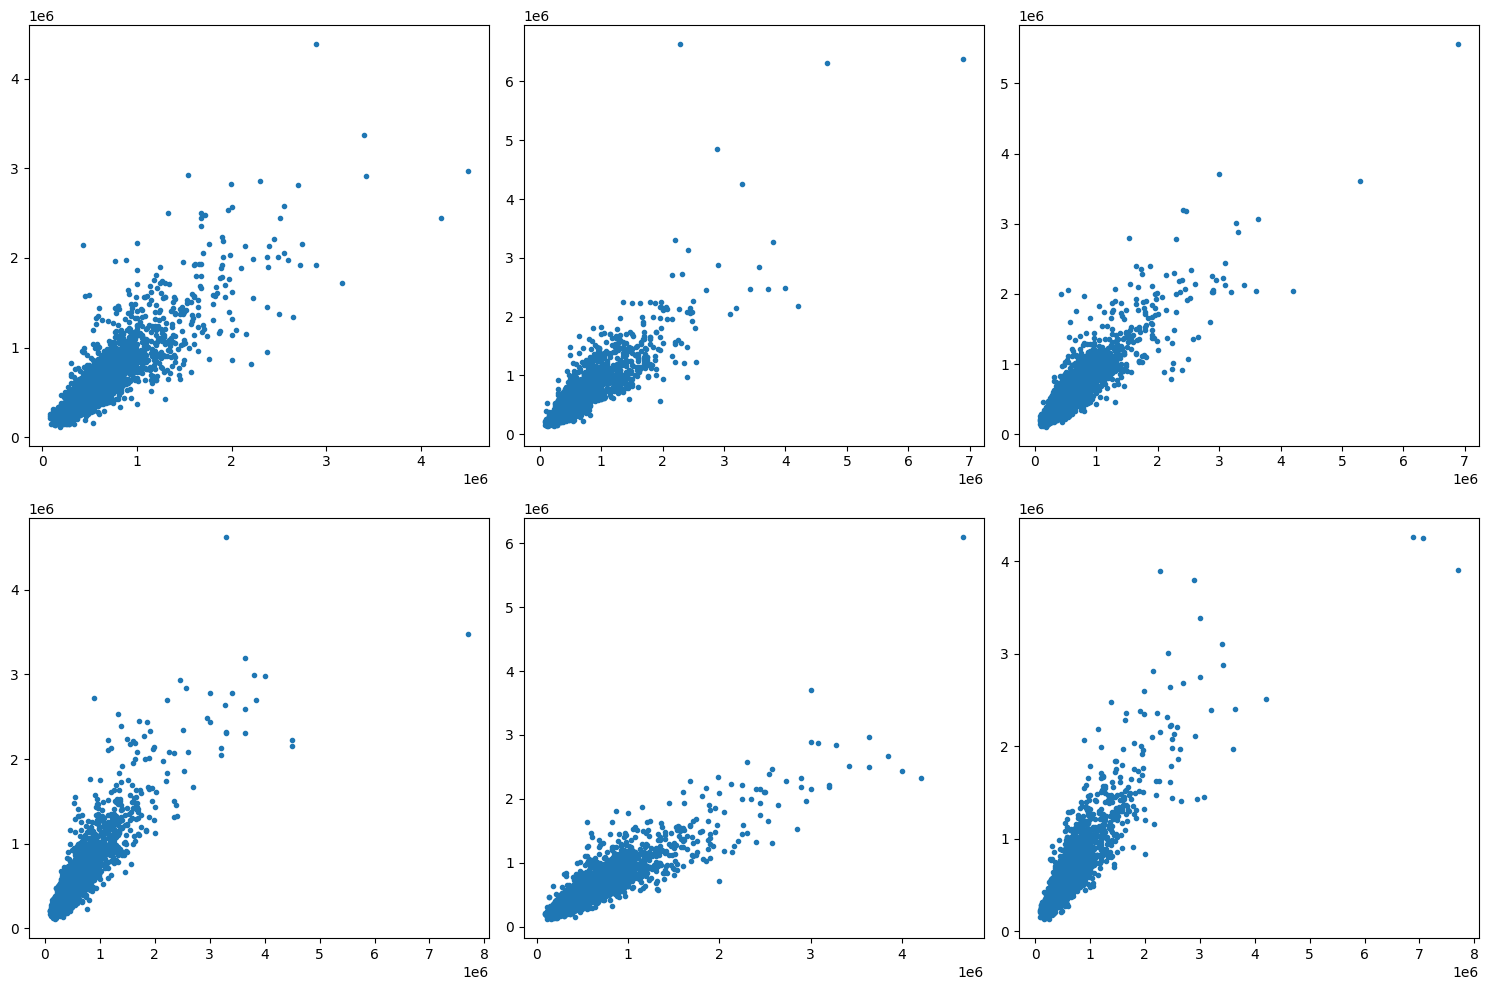

In [ ]:
porcentaje = str(porcentajes[0])

datos_graficar_y = datosIteracion_bosque[porcentaje]['y_pred_list']
datos_graficar_x = datosIteracion_bosque[porcentaje]['y_test_list']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot(datos_graficar_x[valores_aleatorios[0]], datos_graficar_y[valores_aleatorios[0]], '.')
axes[0, 1].plot(datos_graficar_x[valores_aleatorios[1]], datos_graficar_y[valores_aleatorios[1]], '.')
axes[0, 2].plot(datos_graficar_x[valores_aleatorios[2]], datos_graficar_y[valores_aleatorios[2]], '.')
axes[1, 0].plot(datos_graficar_x[valores_aleatorios[3]], datos_graficar_y[valores_aleatorios[3]], '.')
axes[1, 1].plot(datos_graficar_x[valores_aleatorios[4]], datos_graficar_y[valores_aleatorios[4]], '.')
axes[1, 2].plot(datos_graficar_x[valores_aleatorios[5]], datos_graficar_y[valores_aleatorios[5]], '.')
plt.tight_layout()

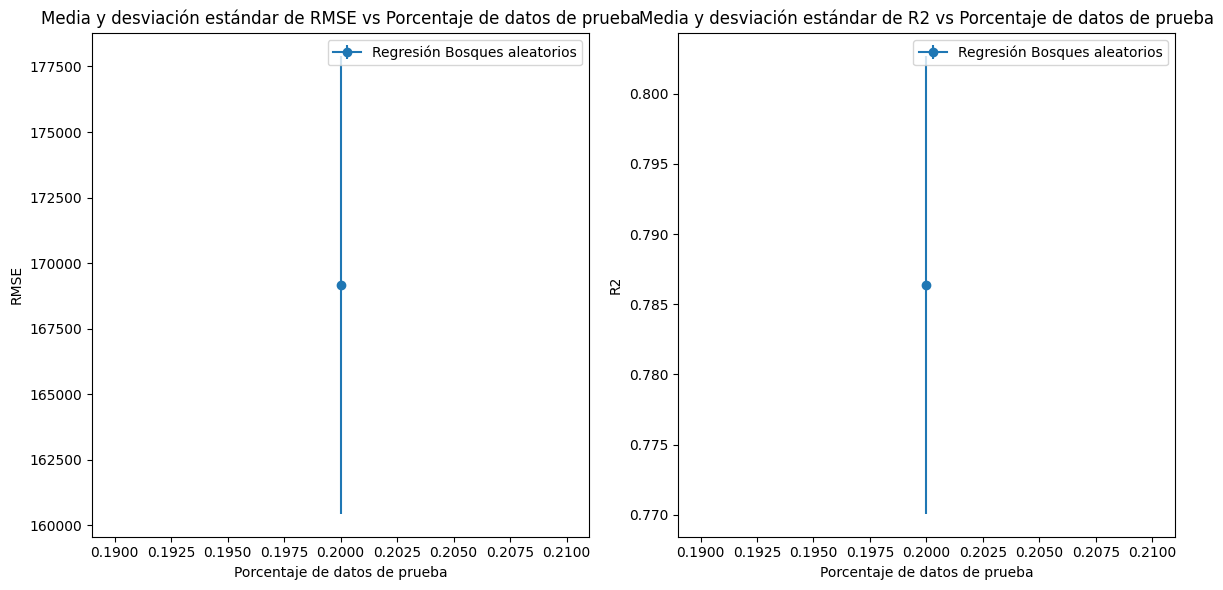

In [ ]:
rmse_mean_bosque_regression = []
rmse_std_bosque_regression = []
r2_mean_bosque_regression = []
r2_std_bosque_regression = []


for i in porcentajes:
  rmse_mean_bosque_regression.append(np.mean(datosIteracion_bosque[str(i)]["rmse_list"]))
  rmse_std_bosque_regression.append(np.std(datosIteracion_bosque[str(i)]["rmse_list"]))
  r2_mean_bosque_regression.append(np.mean(datosIteracion_bosque[str(i)]["r2_list"]))
  r2_std_bosque_regression.append(np.std(datosIteracion_bosque[str(i)]["r2_list"]))

# Graficar RMSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(porcentajes, rmse_mean_bosque_regression, yerr=rmse_std_bosque_regression, label='Regresión Bosques aleatorios', marker='o') #.plot(porcentajes, rmse_mean_linear_regression, marker='o', label='Regresión lineal', linewidth=2, markersize=12)
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('RMSE')
plt.title('Media y desviación estándar de RMSE vs Porcentaje de datos de prueba')
plt.legend()

# Graficar R2
plt.subplot(1, 2, 2)
plt.errorbar(porcentajes, r2_mean_bosque_regression, yerr=r2_std_bosque_regression, label='Regresión Bosques aleatorios', marker='o')
plt.xlabel('Porcentaje de datos de prueba')
plt.ylabel('R2')
plt.title('Media y desviación estándar de R2 vs Porcentaje de datos de prueba')
plt.legend()

plt.tight_layout()
plt.show()

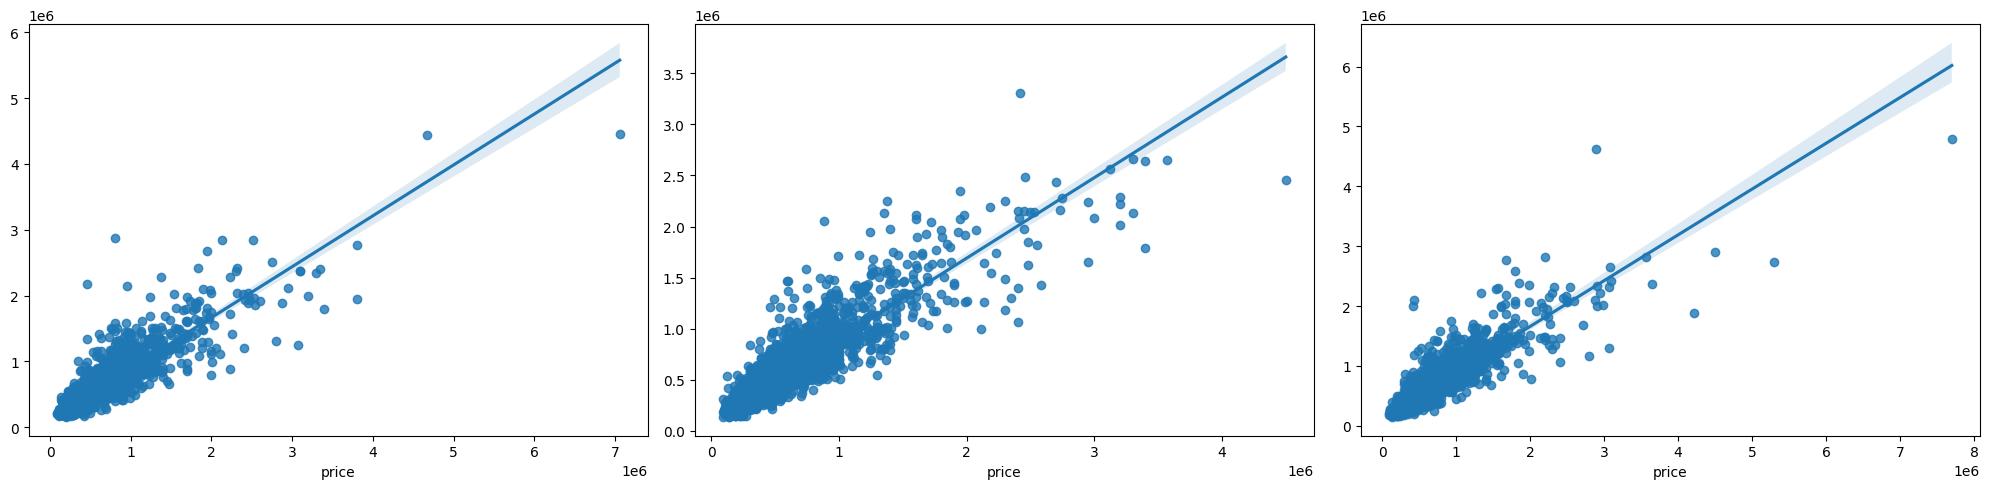

In [ ]:
datos_graficar_y = y_pred_list_bosque
datos_graficar_x = y_test_list_bosque

fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (20, 5))
sns.regplot(y = datos_graficar_y[valores_aleatorios[0]], x = datos_graficar_x[valores_aleatorios[0]], ax = axs[0])
sns.regplot(y = datos_graficar_y[valores_aleatorios[1]], x = datos_graficar_x[valores_aleatorios[1]], ax = axs[1])
sns.regplot(y = datos_graficar_y[valores_aleatorios[2]], x = datos_graficar_x[valores_aleatorios[2]], ax = axs[2])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[3]], x = datos_graficar_x[valores_aleatorios[3]], ax = axs[1, 0])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[4]], x = datos_graficar_x[valores_aleatorios[4]], ax = axs[1, 1])
#sns.regplot(y = datos_graficar_y[valores_aleatorios[5]], x = datos_graficar_x[valores_aleatorios[5]], ax = axs[1, 2])
plt.tight_layout()

# **Red neuronal**

## Todo

In [ ]:
#pd.DataFrame(X_train, columns=df.drop('price', axis=1).columns)


In [ ]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)#,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


In [ ]:
!pip install tensorflow_addons

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow_addons.metrics import RSquare
from tensorflow.keras.callbacks import History
import tensorflow as tf

# Construir el modelo de red neuronal
model = Sequential()

#19,19,1 3 0.5781
#60,19,1 3 0.6418
#120,19,1 3 0.6547
#19,60,1 3 0.6352
#19,120,1 3 0.6630
#19,19,19,1 4 0.7410
#60,19,19,1 4 0.7545
#60,60,19,1 4 0.7649
#60,60,60,1 4 0.7731
#19,60,19,1 4 0.7667
#19,60,60,1 4 0.7653
#19,120,19,1 4 0.7615
#19,60,120,1 4 0.7696
#60,60,120,1 4 0.7781
#120,120,120,1 4 0.7849
#120,120,120,120,1 5 0.8475
#120,120,120,120,120,1 6 0.9076
#120,120,120,120,120,120,1 7 0.9084
#120,120,120,120,120,120,120,1 8 0.9159
#120,120,120,120,120,120,120,120,1 9 0.9238 OK
#120,120,120,120,120,120,120,120,120,1 10 0.9220
#120,120,120,120,120,120,120,240,1 9 0.9204
#120,120,120,120,120,120,240,120,1 9 0.8990
#120,19,19,19,19,19,19,240,1 9 0.8491
#120,19,19,120,19,19,240,1 8 0.9028
#120,19,19,120,19,19,120,1 8 0.9057
#19,19,19,19,19,19,19,19,1 9 0.7981
#60,60,60,60,60,60,60,60,1 9 0.9084
#120,60,120,60,120,60,120,60,1 9 0.9190
#120,60,120,60,120,60,120,120,1 9 0.9206

# input layer
model.add(Dense(120,activation='relu'))

# hidden layers
model.add(Dense(60,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))

# output layer
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=[RSquare()])

# Entrenar el modelo
history = model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          epochs=300)

Epoch 1/300
541/541 [==============================] - 7s 7ms/step - loss: 121456877568.0000 - r_square: 0.1196 - val_loss: 49350692864.0000 - val_r_square: 0.5985
Epoch 2/300
541/541 [==============================] - 6s 11ms/step - loss: 43329966080.0000 - r_square: 0.6859 - val_loss: 35425021952.0000 - val_r_square: 0.7118
Epoch 3/300
541/541 [==============================] - 4s 7ms/step - loss: 37033693184.0000 - r_square: 0.7315 - val_loss: 32952485888.0000 - val_r_square: 0.7319
Epoch 4/300
541/541 [==============================] - 8s 15ms/step - loss: 35374600192.0000 - r_square: 0.7436 - val_loss: 37922684928.0000 - val_r_square: 0.6915
Epoch 5/300
541/541 [==============================] - 5s 10ms/step - loss: 34693931008.0000 - r_square: 0.7485 - val_loss: 33086074880.0000 - val_r_square: 0.7308
Epoch 6/300
541/541 [==============================] - 5s 8ms/step - loss: 33548734464.0000 - r_square: 0.7568 - val_loss: 31139600384.0000 - val_r_square: 0.7467
Epoch 7/300
541/54

In [ ]:
history.model.get_weights()

[array([[-9.41484869e-02,  5.12781560e-01, -9.73249972e-02, ...,
          2.86420017e-01, -4.86107767e-01, -5.85237741e-01],
        [ 1.67331055e-01,  2.29668409e-01,  2.42464282e-02, ...,
         -4.72165138e-01,  4.68264490e-01,  3.75438839e-01],
        [ 3.54051590e-05,  6.38251185e-01,  3.64912868e-01, ...,
         -2.93751091e-01,  5.00447273e-01,  5.57540774e-01],
        ...,
        [-2.77219266e-02, -7.56960690e-01,  1.04206176e-02, ...,
         -2.42001623e-01, -7.30494022e-01, -1.15683699e+00],
        [-1.47463247e-01, -5.10436594e-01, -9.48700309e-02, ...,
          3.86821181e-01, -5.70007682e-01,  7.63121620e-03],
        [-8.17214996e-02,  1.06654927e-01,  1.05920136e-01, ...,
          3.18057686e-01, -8.16151779e-03,  1.20483480e-01]], dtype=float32),
 array([ 0.00000000e+00, -4.03140098e-01, -3.56634855e-01, -3.32396217e-02,
         4.23138052e-01, -1.83730185e-01, -2.15435952e-01, -4.82736856e-01,
        -3.32605034e-01, -3.08416277e-01, -4.94684130e-01, -5.

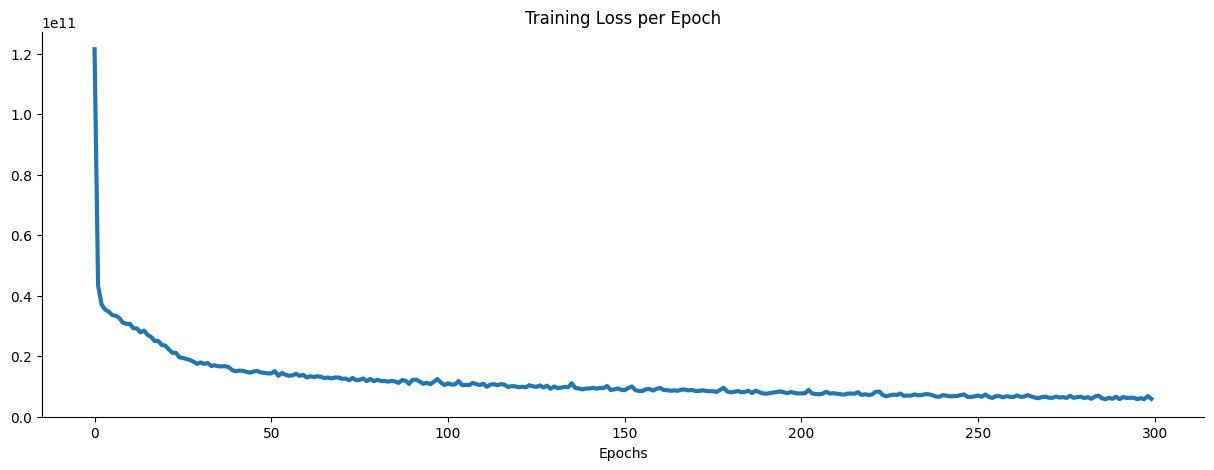

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses['loss'],lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
print('R2: ',r2_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

136/136 [==============================] - 0s 3ms/step
MAE:  75297.76141785219
MSE:  17103685737.053598
RMSE:  130781.0603147627
Variance Regression Score:  0.8642355918064147
R2:  0.8608487985833126


Descriptive Statistics:
 count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


<ipython-input-131-662239efb9f7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Precios de prueba'),
 Text(0, 0.5, 'Predicciones'),
 Text(0.5, 1.0, 'Predicciones vs Precios de prueba')]

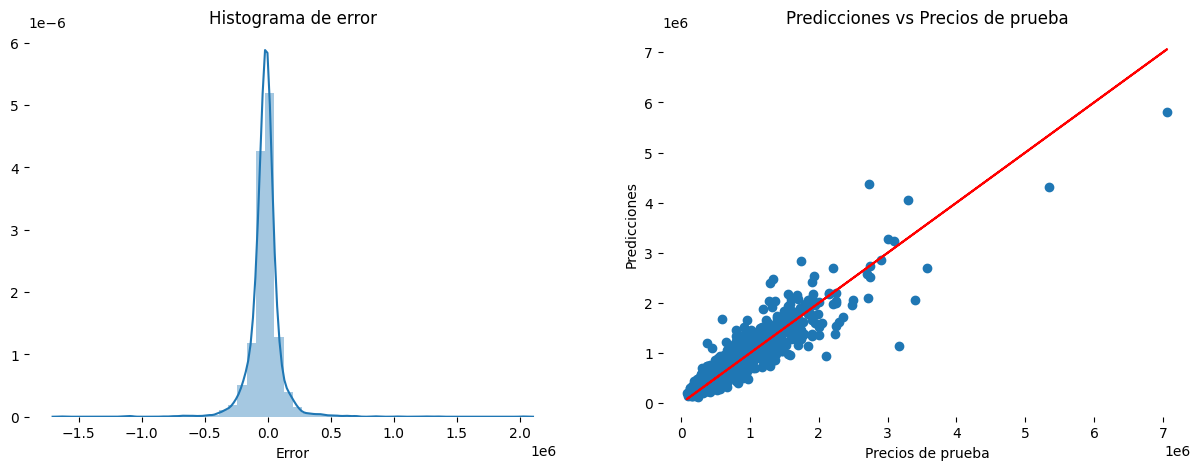

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(4323 , 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Histograma de error')
axes[1].set(xlabel='Precios de prueba', ylabel='Predicciones', title='Predicciones vs Precios de prueba')

In [ ]:
history.history.keys()

dict_keys(['loss', 'r_square', 'val_loss', 'val_r_square'])

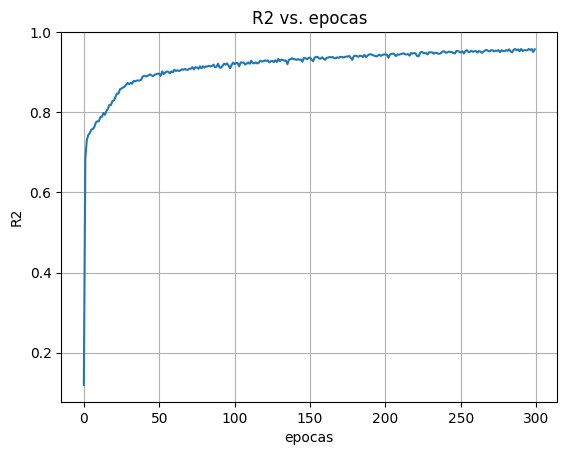

In [ ]:
# @title Precision Vs epocas
plt.plot(history.history['r_square'])
plt.xlabel('epocas')
plt.ylabel('R2')
plt.title('R2 vs. epocas')
plt.grid()

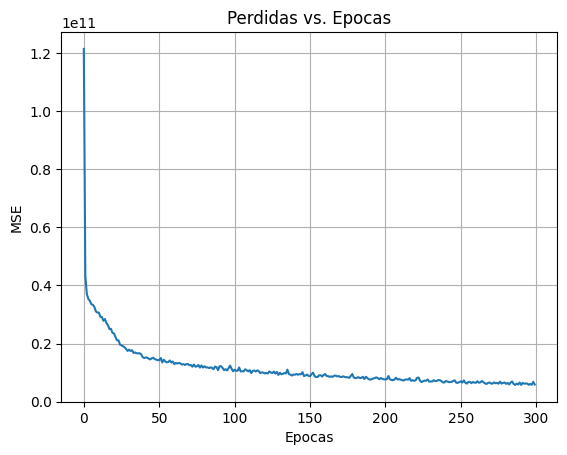

In [ ]:
# @title Perdidas Vs epocas
plt.plot(history.history['loss'])
plt.xlabel('Epocas')
plt.ylabel('MSE')
plt.title('Perdidas vs. Epocas')
plt.grid()

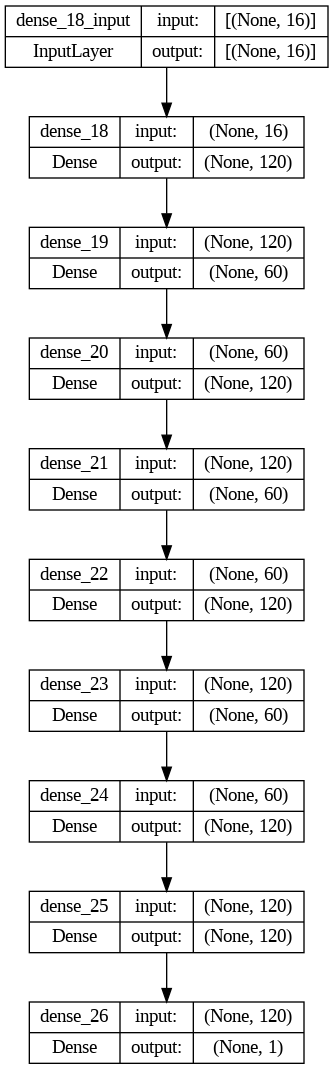

In [ ]:
# @title Arquitectura del modelo
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True)

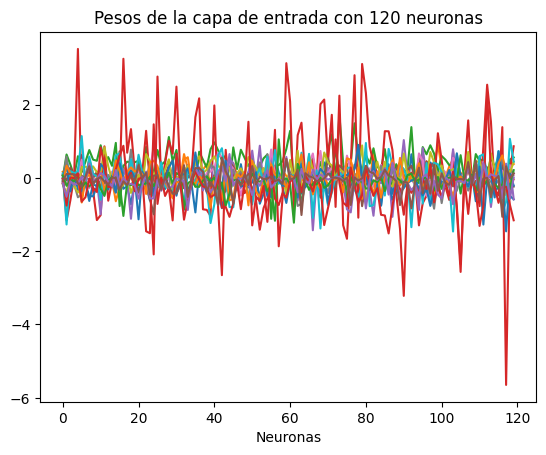

In [ ]:
for i in range(len(model.get_weights()[0])):
  plt.plot(model.get_weights()[0][i])
plt.title("Pesos de la capa de entrada con 120 neuronas")
plt.xlabel("Neuronas")
plt.show()

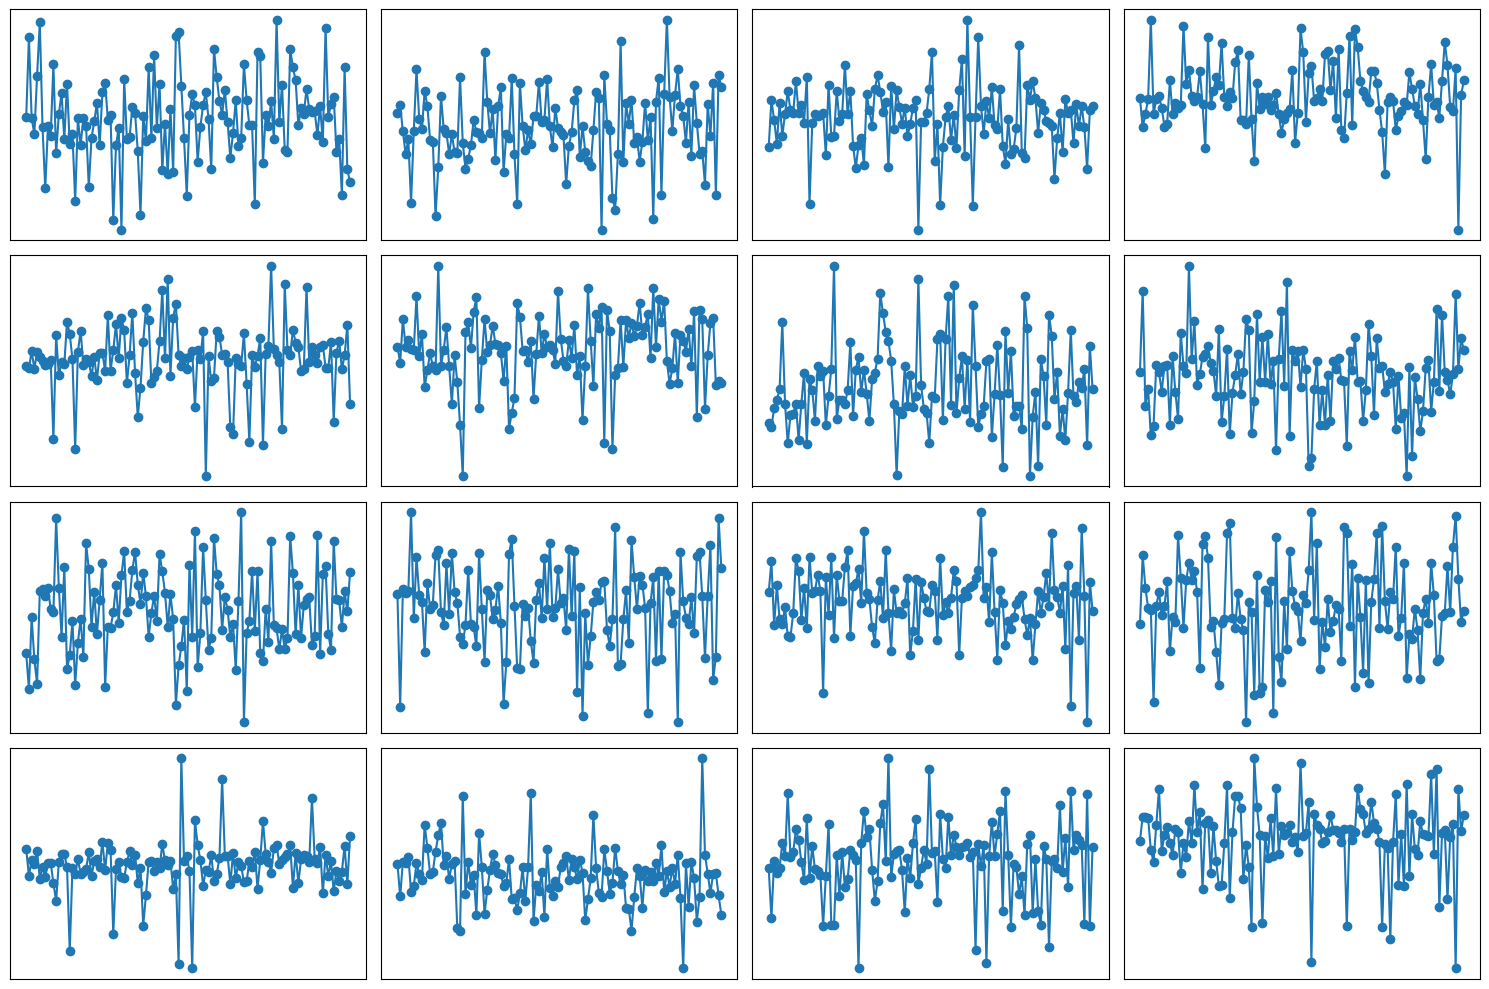

In [ ]:
# Create a figure with 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, figsize=(15, 10))

# Plot the first 16 elements of model.get_weights()[0]
for i in range(16):
    # Select the corresponding subplot
    ax = axes[i // 4, i % 4]

    # Plot the data
    ax.plot(model.get_weights()[0][i], '-o')

    # Set the title
    #ax.set_title(f"Neurona {i + 1}")

    # Hide the axes
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


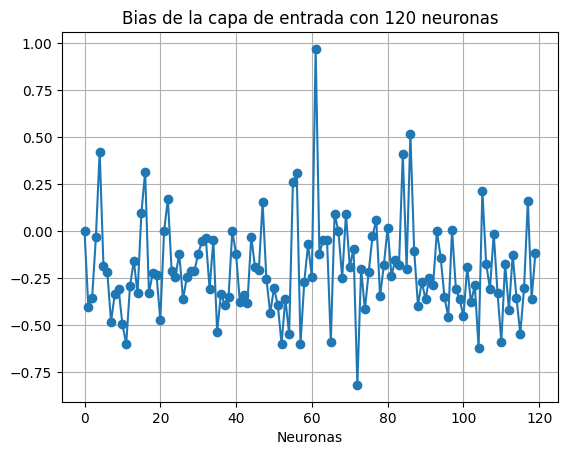

In [ ]:
plt.plot(model.get_weights()[1], '-o')
plt.grid()
plt.xlabel("Neuronas")
plt.title("Bias de la capa de entrada con 120 neuronas")
plt.show()

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 120)               2040      
                                                                 
 dense_19 (Dense)            (None, 60)                7260      
                                                                 
 dense_20 (Dense)            (None, 120)               7320      
                                                                 
 dense_21 (Dense)            (None, 60)                7260      
                                                                 
 dense_22 (Dense)            (None, 120)               7320      
                                                                 
 dense_23 (Dense)            (None, 60)                7260      
                                                                 
 dense_24 (Dense)            (None, 120)              

## prunning

In [ ]:
!pip install tensorflow-model-optimization

In [ ]:
import tensorflow as tf
model_original = tf.keras.models.clone_model(model)

In [ ]:
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_schedule
from tensorflow_model_optimization.sparsity import keras as sparsity

pruning_params = {
    'pruning_schedule': pruning_schedule.ConstantSparsity(target_sparsity=0.4, begin_step=0, end_step=-1)
}

pruned_model = sparsity.prune_low_magnitude(model, **pruning_params)

In [ ]:
#from tensorflow_model_optimization.sparsity import keras as sparsity
#pruning_params = {
#    'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.0,#0.1,#0.50,
#                                                 final_sparsity=0.3,#0.3,#0.90,
#                                                 begin_step=0,
#                                                 end_step=1000)
#}

#pruned_model = sparsity.prune_low_magnitude(model, **pruning_params)

In [ ]:
pruned_model.compile(optimizer='adam', loss='mse', metrics=[RSquare()])
history_pruned =pruned_model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          epochs=300)

Epoch 1/300
541/541 [==============================] - 16s 13ms/step - loss: 9889201152.0000 - r_square: 0.9283 - val_loss: 18472761344.0000 - val_r_square: 0.8497
Epoch 2/300
541/541 [==============================] - 6s 12ms/step - loss: 7231448576.0000 - r_square: 0.9476 - val_loss: 17286377472.0000 - val_r_square: 0.8594
Epoch 3/300
541/541 [==============================] - 7s 14ms/step - loss: 6798862848.0000 - r_square: 0.9507 - val_loss: 17794215936.0000 - val_r_square: 0.8552
Epoch 4/300
541/541 [==============================] - 5s 10ms/step - loss: 6459902464.0000 - r_square: 0.9532 - val_loss: 16859484160.0000 - val_r_square: 0.8628
Epoch 5/300
541/541 [==============================] - 7s 13ms/step - loss: 6404745216.0000 - r_square: 0.9536 - val_loss: 17781950464.0000 - val_r_square: 0.8553
Epoch 6/300
541/541 [==============================] - 6s 11ms/step - loss: 6345005568.0000 - r_square: 0.9540 - val_loss: 18362488832.0000 - val_r_square: 0.8506
Epoch 7/300
541/541 [

In [ ]:
y_test

In [ ]:
y_pred = pruned_model.predict(X_test)

print('R2: ',r2_score(y_test,y_pred))



136/136 [==============================] - 2s 7ms/step
R2:  0.8532506954523068


<ipython-input-146-e9e2949a578e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Precios de prueba'),
 Text(0, 0.5, 'Predicciones'),
 Text(0.5, 1.0, 'Predicciones vs Precios de prueba')]

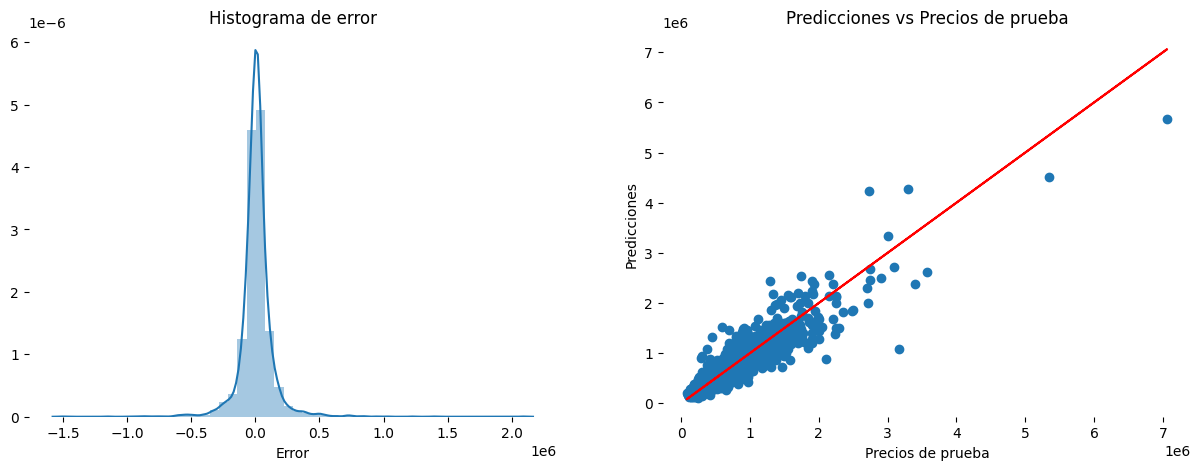

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,y_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(4323 , 1) - y_pred
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Histograma de error')
axes[1].set(xlabel='Precios de prueba', ylabel='Predicciones', title='Predicciones vs Precios de prueba')

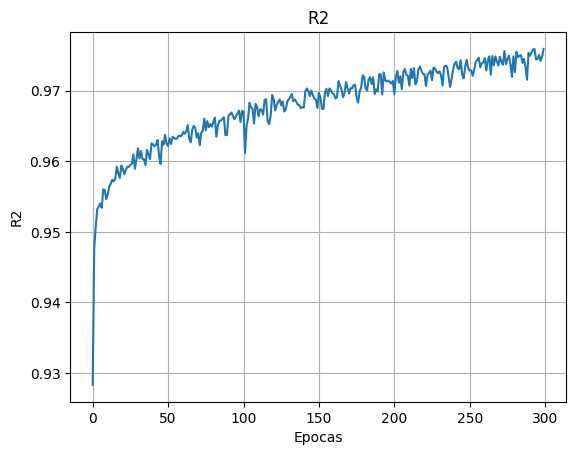

In [ ]:
plt.plot(history_pruned.history["r_square"])
plt.grid()
plt.title("R2")
plt.xlabel("Epocas")
plt.ylabel("R2")
plt.show()

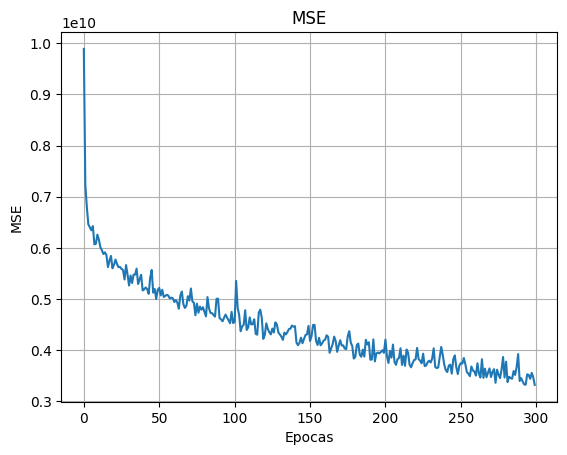

In [ ]:
plt.plot(history_pruned.history["loss"])
plt.grid()
plt.title("MSE")
plt.xlabel("Epocas")
plt.ylabel("MSE")
plt.show()

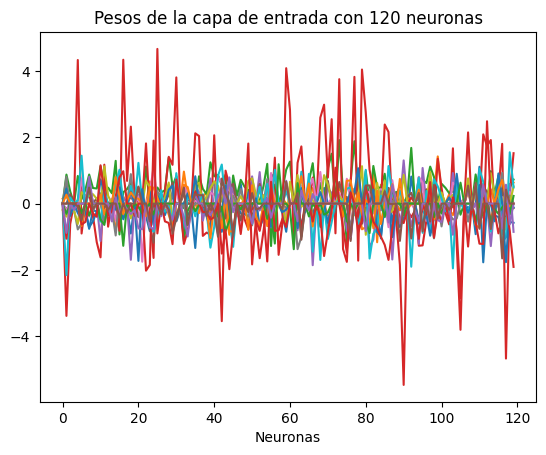

In [ ]:
for i in range(len(pruned_model.get_weights()[0])):
  plt.plot(pruned_model.get_weights()[0][i])
plt.title("Pesos de la capa de entrada con 120 neuronas")
plt.xlabel("Neuronas")
plt.show()

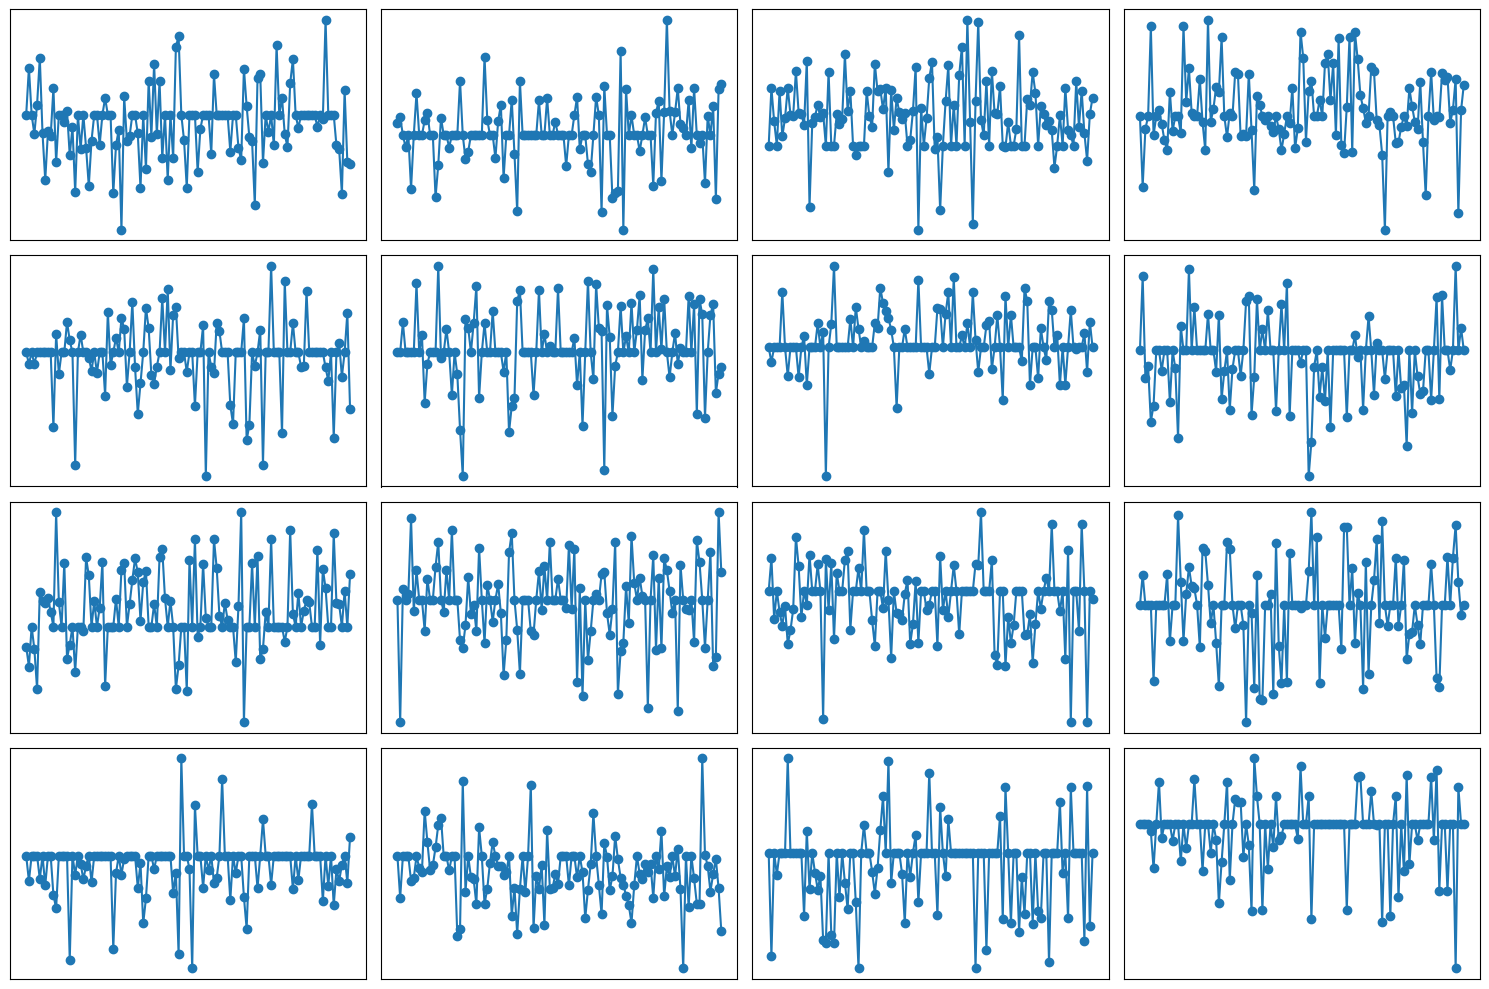

In [ ]:
# Create a figure with 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, figsize=(15, 10))

# Plot the first 16 elements of model.get_weights()[0]
for i in range(16):
    # Select the corresponding subplot
    ax = axes[i // 4, i % 4]

    # Plot the data
    ax.plot(pruned_model.get_weights()[0][i], '-o')

    # Set the title
    #ax.set_title(f"Neurona {i + 1}")

    # Hide the axes
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

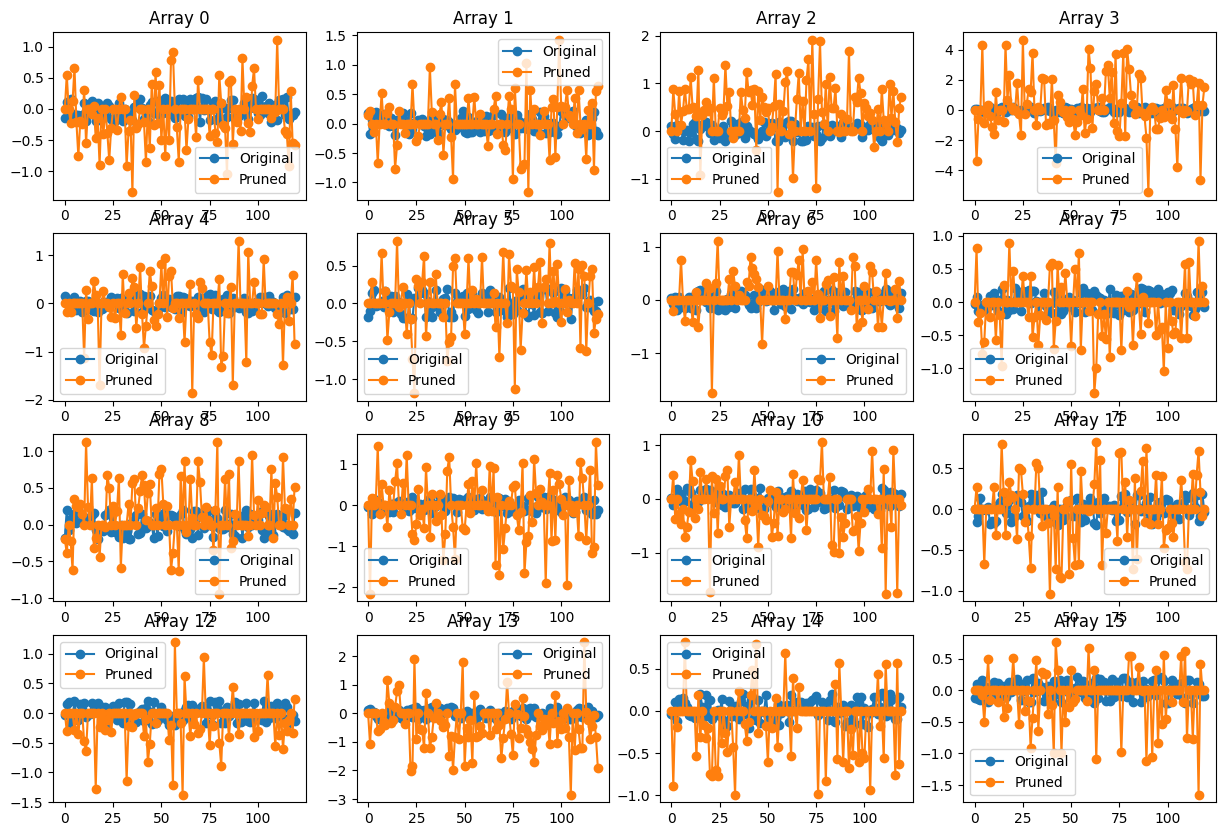

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
  ax.plot(model_original.get_weights()[0][i],'-o')
  ax.plot(pruned_model.get_weights()[0][i],'-o')
  ax.set_title(f"Array {i}")
  ax.legend(["Original", "Pruned"])
plt.show()

In [ ]:
conteo_0 = 0
for i in range(len(pruned_model.get_weights()[0])):
  datos = pruned_model.get_weights()[0][i]
  conteo_0 += len(datos[datos == 0])

print("Conteo de pesos en 0 para la capa oculta: ", conteo_0)

Conteo de pesos en 0 para la capa oculta:  768


## Iteraciones pruned

In [ ]:
mse_his = []
r2_his = []
y_test_list = []
predictions_list = []

for i in range(10):
  print("Iteracion: ", i)
  # Split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)#,random_state=101)

  scaler = MinMaxScaler()

  # fit and transfrom
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  pruned_model.compile(optimizer='adam', loss='mse', metrics=[RSquare()])
  history_pruned =pruned_model.fit(x=X_train,y=y_train.values,
            validation_data=(X_test,y_test.values),
            epochs=100)

  predictions = pruned_model.predict(X_test)

  mse_his.append(mean_squared_error(y_test,predictions))
  r2_his.append(r2_score(y_test,predictions))
  y_test_list.append(y_test)
  predictions_list.append(predictions)

Iteracion:  0
Epoch 1/100
541/541 [==============================] - 9s 6ms/step - loss: 13728650240.0000 - r_square: 0.8985 - val_loss: 14833809408.0000 - val_r_square: 0.8889
Epoch 2/100
541/541 [==============================] - 3s 5ms/step - loss: 13376569344.0000 - r_square: 0.9011 - val_loss: 14892984320.0000 - val_r_square: 0.8884
Epoch 3/100
541/541 [==============================] - 3s 6ms/step - loss: 13307502592.0000 - r_square: 0.9017 - val_loss: 15392312320.0000 - val_r_square: 0.8847
Epoch 4/100
541/541 [==============================] - 4s 7ms/step - loss: 13281558528.0000 - r_square: 0.9018 - val_loss: 15143331840.0000 - val_r_square: 0.8866
Epoch 5/100
541/541 [==============================] - 3s 5ms/step - loss: 13236567040.0000 - r_square: 0.9022 - val_loss: 14824345600.0000 - val_r_square: 0.8890
Epoch 6/100
541/541 [==============================] - 3s 5ms/step - loss: 13194334208.0000 - r_square: 0.9025 - val_loss: 15252992000.0000 - val_r_square: 0.8857
Epoch 7/

In [ ]:
print("R2 promedio: ", np.mean(r2_his))
print("MSE promedio: ", np.mean(mse_his))

R2 promedio:  0.8975340099449882
MSE promedio:  13881876188.420563


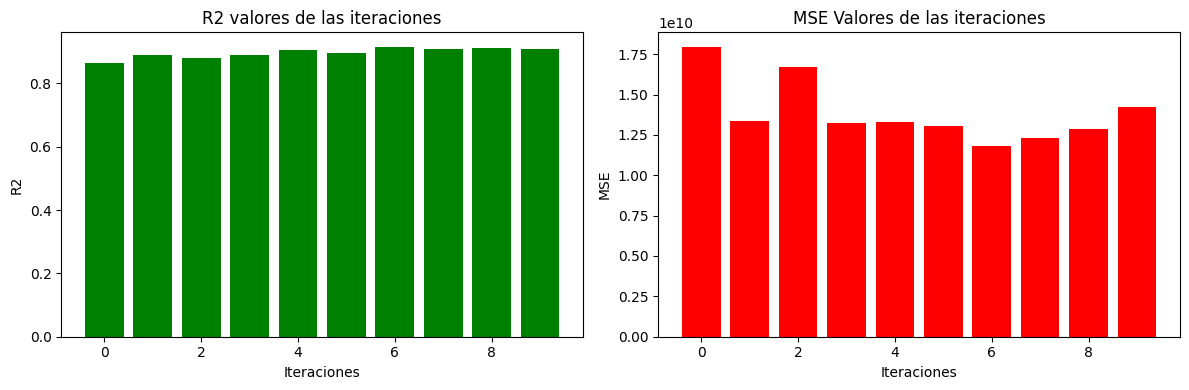

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot R2 values in the first subplot
ax1.bar(range(len(r2_his)), r2_his, color='green')
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('R2')
ax1.set_title('R2 valores de las iteraciones')

# Plot MSE values in the second subplot
ax2.bar(range(len(mse_his)), mse_his, color='red')
ax2.set_xlabel('Iteraciones')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Valores de las iteraciones')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
import random

# Definir la cantidad de valores aleatorios a generar
cantidad_valores = 6

# Generar una lista de valores aleatorios entre 0 y 1000
valores_aleatorios = [random.randint(0, 10) for _ in range(cantidad_valores)]

# Imprimir la lista de valores aleatorios
print("Valores aleatorios:", valores_aleatorios)

Valores aleatorios: [5, 9, 6, 4, 7, 7]


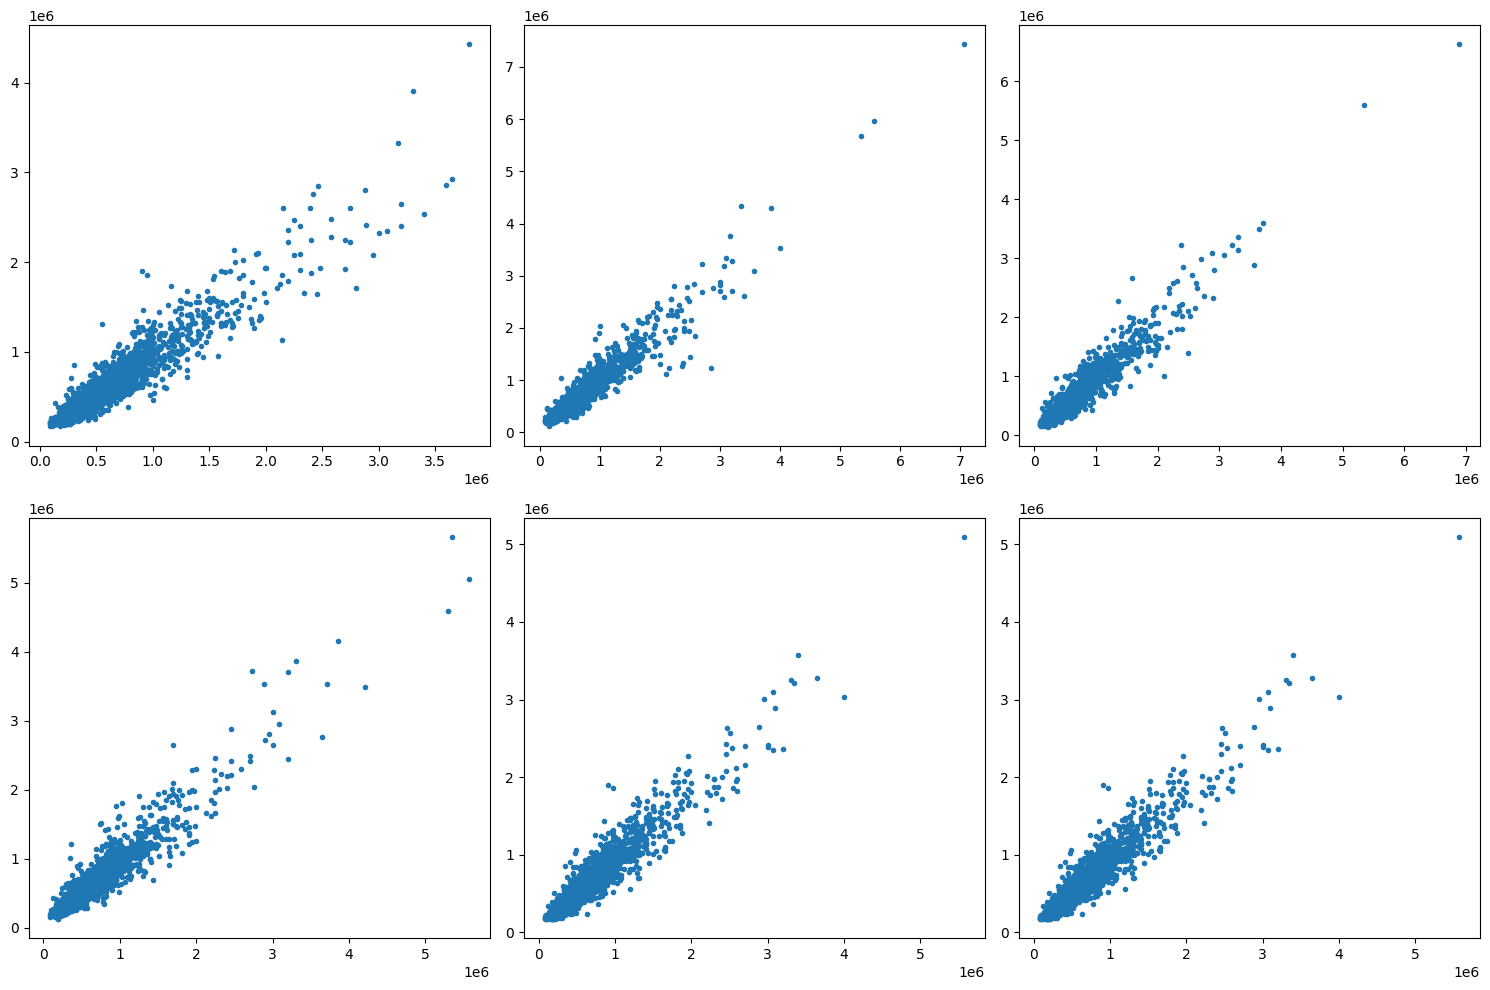

In [ ]:
datos_graficar_y = predictions_list
datos_graficar_x = y_test_list

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot(datos_graficar_x[valores_aleatorios[0]], datos_graficar_y[valores_aleatorios[0]], '.')
axes[0, 1].plot(datos_graficar_x[valores_aleatorios[1]], datos_graficar_y[valores_aleatorios[1]], '.')
axes[0, 2].plot(datos_graficar_x[valores_aleatorios[2]], datos_graficar_y[valores_aleatorios[2]], '.')
axes[1, 0].plot(datos_graficar_x[valores_aleatorios[3]], datos_graficar_y[valores_aleatorios[3]], '.')
axes[1, 1].plot(datos_graficar_x[valores_aleatorios[4]], datos_graficar_y[valores_aleatorios[4]], '.')
axes[1, 2].plot(datos_graficar_x[valores_aleatorios[5]], datos_graficar_y[valores_aleatorios[5]], '.')
plt.tight_layout()

## Iteraciones

In [ ]:
mse_his = []
r2_his = []
y_test_list = []
predictions_list = []

for i in range(10):
  print("Iteracion: ", i)
  # Split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)#,random_state=101)

  scaler = MinMaxScaler()

  # fit and transfrom
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  model = Sequential()

  # input layer
  model.add(Dense(120,activation='relu'))

  # hidden layers
  model.add(Dense(60,activation='relu'))
  model.add(Dense(120,activation='relu'))
  model.add(Dense(60,activation='relu'))
  model.add(Dense(120,activation='relu'))
  model.add(Dense(60,activation='relu'))
  model.add(Dense(120,activation='relu'))
  model.add(Dense(120,activation='relu'))

  # output layer
  model.add(Dense(1))

  # Compilar el modelo
  model.compile(optimizer='adam', loss='mse', metrics=[RSquare()])

  # Entrenar el modelo
  history = model.fit(x=X_train,y=y_train.values,
            validation_data=(X_test,y_test.values),
            epochs=100)

  predictions = model.predict(X_test)

  mse_his.append(mean_squared_error(y_test,predictions))
  r2_his.append(r2_score(y_test,predictions))
  y_test_list.append(y_test)
  predictions_list.append(predictions)

Iteracion:  0
Epoch 1/100
541/541 [==============================] - 5s 4ms/step - loss: 118799269888.0000 - r_square: 0.1212 - val_loss: 58024329216.0000 - val_r_square: 0.5669
Epoch 2/100
541/541 [==============================] - 3s 6ms/step - loss: 47484362752.0000 - r_square: 0.6488 - val_loss: 42321108992.0000 - val_r_square: 0.6841
Epoch 3/100
541/541 [==============================] - 2s 4ms/step - loss: 39173541888.0000 - r_square: 0.7102 - val_loss: 36485672960.0000 - val_r_square: 0.7277
Epoch 4/100
541/541 [==============================] - 2s 4ms/step - loss: 36047622144.0000 - r_square: 0.7334 - val_loss: 37581856768.0000 - val_r_square: 0.7195
Epoch 5/100
541/541 [==============================] - 2s 4ms/step - loss: 34277775360.0000 - r_square: 0.7464 - val_loss: 41181024256.0000 - val_r_square: 0.6926
Epoch 6/100
541/541 [==============================] - 2s 4ms/step - loss: 34180962304.0000 - r_square: 0.7472 - val_loss: 33972860928.0000 - val_r_square: 0.7464
Epoch 7

In [ ]:
print("R2 promedio: ", np.mean(r2_his))
print("MSE promedio: ", np.mean(mse_his))

R2 promedio:  0.8714021042995169
MSE promedio:  16403593294.711407


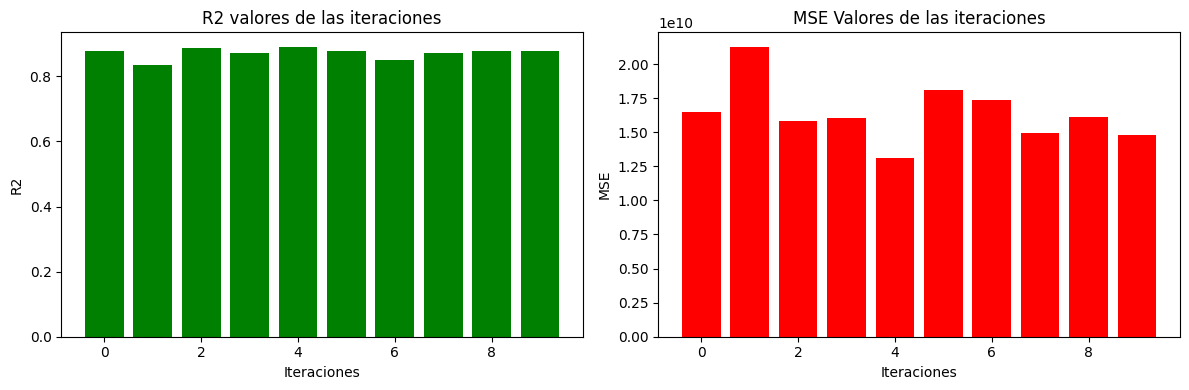

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot R2 values in the first subplot
ax1.bar(range(len(r2_his)), r2_his, color='green')
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('R2')
ax1.set_title('R2 valores de las iteraciones')

# Plot MSE values in the second subplot
ax2.bar(range(len(mse_his)), mse_his, color='red')
ax2.set_xlabel('Iteraciones')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Valores de las iteraciones')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [ ]:
import random

# Definir la cantidad de valores aleatorios a generar
cantidad_valores = 6

# Generar una lista de valores aleatorios entre 0 y 1000
valores_aleatorios = [random.randint(0, 10) for _ in range(cantidad_valores)]

# Imprimir la lista de valores aleatorios
print("Valores aleatorios:", valores_aleatorios)

Valores aleatorios: [2, 5, 3, 7, 8, 0]


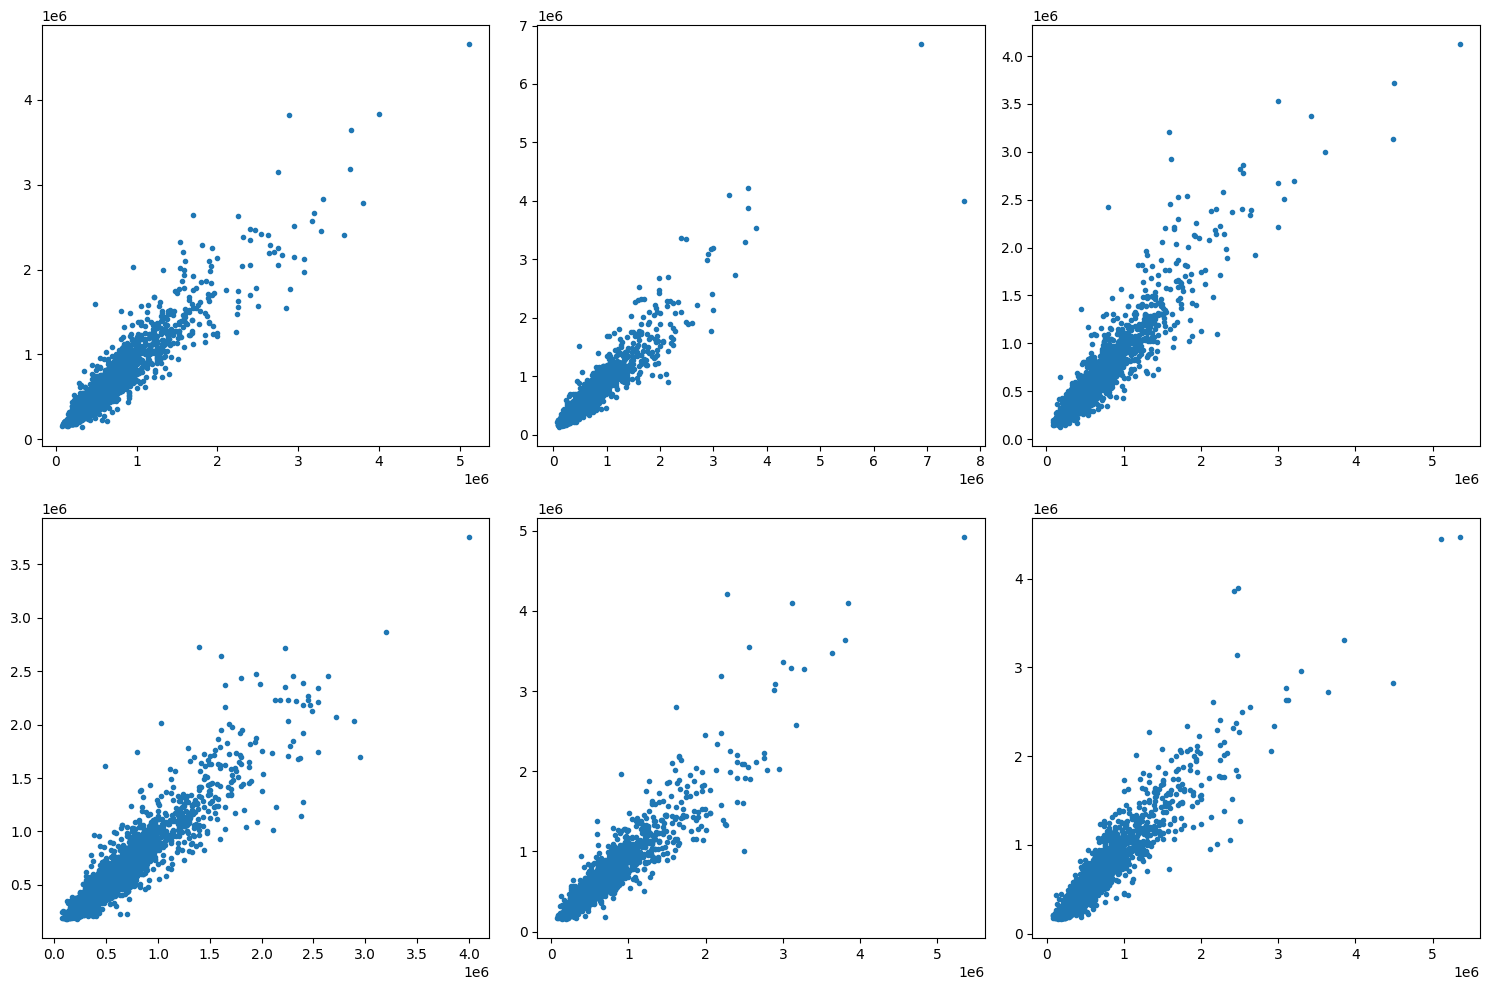

In [ ]:
datos_graficar_y = predictions_list
datos_graficar_x = y_test_list

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot(datos_graficar_x[valores_aleatorios[0]], datos_graficar_y[valores_aleatorios[0]], '.')
axes[0, 1].plot(datos_graficar_x[valores_aleatorios[1]], datos_graficar_y[valores_aleatorios[1]], '.')
axes[0, 2].plot(datos_graficar_x[valores_aleatorios[2]], datos_graficar_y[valores_aleatorios[2]], '.')
axes[1, 0].plot(datos_graficar_x[valores_aleatorios[3]], datos_graficar_y[valores_aleatorios[3]], '.')
axes[1, 1].plot(datos_graficar_x[valores_aleatorios[4]], datos_graficar_y[valores_aleatorios[4]], '.')
axes[1, 2].plot(datos_graficar_x[valores_aleatorios[5]], datos_graficar_y[valores_aleatorios[5]], '.')
plt.tight_layout()

# **Algoritmo de evolución diferencial**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **Funcion objetivo**

In [ ]:
#historial = {}  # Para almacenar el valor de la función objetivo en cada generación
iteracion = '1'
#historial[str(iteracion)] = []

# Función objetivo para el algoritmo DE
def objective_function(solucion_candidata, *args):

    # Desempaqueta los argumentos
    features_train, target_train, features_test, target_test = args

    # Construye el modelo con los parámetros dados por la solución candidata
    modelo_rf = RandomForestRegressor(n_estimators=int(solucion_candidata[0]),
                                      max_depth=int(solucion_candidata[1]),
                                      min_samples_split=int(solucion_candidata[2]),
                                      min_samples_leaf=int(solucion_candidata[3]),
                                      random_state=0)

     # Entrena el modelo
    modelo_rf.fit(features_train, target_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = modelo_rf.predict(features_test)

    # Calcular RMSE
    #rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mse = mean_squared_error(y_test, y_pred)
    rmse_percentage = np.sqrt(mse) / np.ptp(y_test)  # Calcular RMSE% en relación con el rango de la variable de respuesta

    # Calcular R^2
    r2 = r2_score(y_test, y_pred)

    #print("r2: " , r2)
    #print("rmse%: " , rmse_percentage)

    res = 0.5 * rmse_percentage + 0.5 * (1 - r2) #(1 - r2)

    historial[str(iteracion)].append(res)

    # Devolver una combinación ponderada de RMSE y 1 - R^2 (minimizar ambos)
    return res

## **Evolucion diferencial**

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Configuración para la evolución diferencial
limites_parametros = [(20,150),#(1, 100),  # Número de estimadores (n_estimators)
                      (10,40), #(1,30),   # Profundidad máxima del árbol (max_depth)
                      #]
                      (2, 20),   # Mínimo de muestras requeridas para dividir un nodo (min_samples_split)
                      (1, 20)]   # Mínimo de muestras requeridas en cada hoja (min_samples_leaf)
#parameters = {'n_estimators':[20, 50, 100,110,120,150], 'max_depth':[10,20,30,40]}
historial = {}  # Para almacenar el valor de la función objetivo en cada generación
iteracion = '1'
historial[str(iteracion)] = []

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ejecutar la evolución diferencial con la función de callback
resultados_evolution = differential_evolution(objective_function, limites_parametros,
                                               args=(X_train, y_train, X_test, y_test),
                                               popsize=30, maxiter=5, tol=0.01, strategy='best1bin')


NameError: ignored

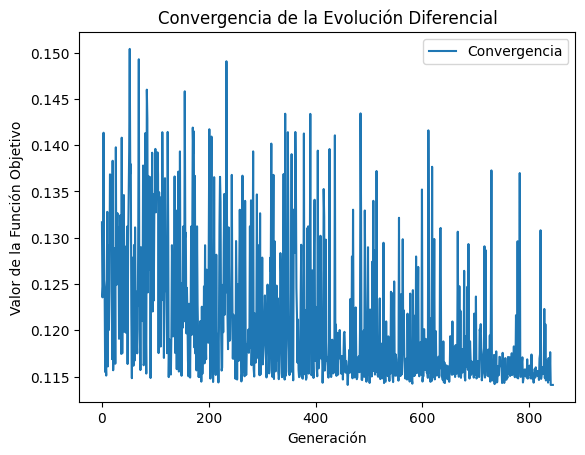

In [ ]:
# Graficar la convergencia
generaciones = range(len(historial['0']))
plt.plot(generaciones, historial['0'], label='Convergencia')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Convergencia de la Evolución Diferencial')
plt.legend()
plt.show()

In [ ]:
print("Valor: ", 1-min(historial))
print("Indice: ", historial.index(min(historial)))

TypeError: ignored

In [ ]:
len(historial['1'])

## **Corridas independientes**

In [ ]:
import matplotlib.pyplot as plt

# Configuración para la evolución diferencial
limites_parametros = [(20,150),#(1, 100),  # Número de estimadores (n_estimators)
                      (10,40), #(1,30),   # Profundidad máxima del árbol (max_depth)
                      #]
                      (2, 20),   # Mínimo de muestras requeridas para dividir un nodo (min_samples_split)
                      (1, 20)]   # Mínimo de muestras requeridas en cada hoja (min_samples_leaf)

historial = {}  # Para almacenar el valor de la función objetivo en cada generación

# Recopilar resultados de todas las corridas
all_results_fun = []
all_results_x = []

for i in range(5):
    print("Inicio iteracion: ", i)
    iteracion = str(i)
    historial[iteracion] = []

    # Divide el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


    # Ejecuta la evolución diferencial
    resultados_evolution = optimize.differential_evolution(objective_function, limites_parametros,
                                               args=(X_train, y_train, X_test, y_test),
                                               popsize=30, maxiter=1000, tol=0.01, strategy='best1bin')
    all_results_fun.append(resultados_evolution.fun)
    all_results_x.append(resultados_evolution.x)

    print("Fin iteracion: ", i)

Inicio iteracion:  0
Fin iteracion:  0
Inicio iteracion:  1
Fin iteracion:  1
Inicio iteracion:  2
Fin iteracion:  2
Inicio iteracion:  3
Fin iteracion:  3
Inicio iteracion:  4
Fin iteracion:  4


In [ ]:
for i in range(16, 18):
    print("Inicio iteracion: ", i)
    iteracion = str(i)
    historial[iteracion] = []

    # Divide el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


    # Ejecuta la evolución diferencial
    resultados_evolution = optimize.differential_evolution(objective_function, limites_parametros,
                                               args=(X_train, y_train, X_test, y_test),
                                               popsize=30, maxiter=1000, tol=0.01, strategy='best1bin')
    all_results_fun.append(resultados_evolution.fun)
    all_results_x.append(resultados_evolution.x)

    print("Fin iteracion: ", i)

print("FIN!!!!!!!!!!")

Inicio iteracion:  16
Fin iteracion:  16
Inicio iteracion:  17


In [ ]:
print(historial)

{'0': [0.1254414148507664, 0.13274004681569676, 0.12243466541602231, 0.12295523001369632, 0.12048422261526018, 0.12272520777747409, 0.14436880115511225, 0.1591822176840995, 0.14727725392904598, 0.14353334272427126, 0.14148956832319673, 0.1492459712471586, 0.13007717361603832, 0.1318127194688123, 0.13618542199149758, 0.14164900665600125, 0.13142198614921646, 0.13019798326918072, 0.14192425119102509, 0.1420046875295968, 0.13470079859260853, 0.1454808451830975, 0.12211861716051041, 0.13871572748934471, 0.1309348947358393, 0.15377222206757257, 0.1574196696906575, 0.12369623500891606, 0.15074622921088932, 0.11989669758450708, 0.14082501624606797, 0.129204557317277, 0.13344862953643244, 0.1478927845383065, 0.12553473549491834, 0.15372810601660886, 0.13292856928095587, 0.13337536382052206, 0.13865708609985403, 0.1610739633336761, 0.13841729007664139, 0.12125222813028007, 0.12491175654126961, 0.14637731288337974, 0.15090717907500895, 0.1413333364568984, 0.13672221294679449, 0.12289603266397012

In [ ]:
for i in range(9, 17):
  print(i)

9
10
11
12
13
14
15
16


In [ ]:
# Caracterización estadística de los resultados
media_resultados = np.mean(all_results_fun)
std_resultados = np.std(all_results_fun)

In [ ]:
print(all_results_x)
print(all_results_fun)

[array([91.68971102, 19.440094  ,  4.89878283,  2.62345119]), array([25.01779971, 24.10264297, 14.81783978,  2.04532715]), array([133.80259495,  36.88773517,  18.72213055,   1.35466864]), array([139.45100393,  18.18999559,  12.83214789,   1.59024704]), array([95.96941291, 28.47004275, 13.68472706,  1.27308755])]
[0.11844676290358824, 0.11222152765902499, 0.10590317584089647, 0.10748424358915074, 0.12193664590965962]


## **Histograma de las mejores soluciones**

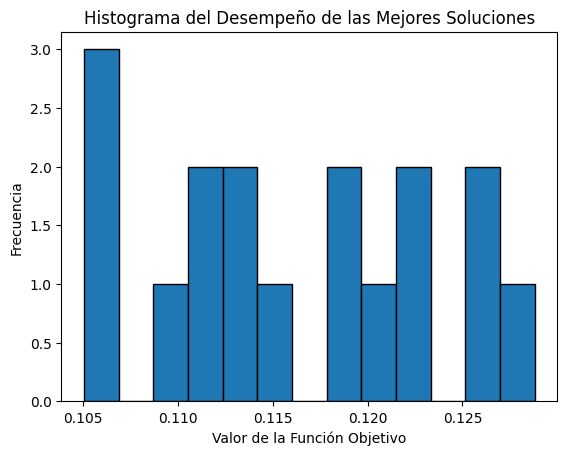

Media de los resultados: 0.11632143954162044
Desviación estándar de los resultados: 0.007228887228839595


In [ ]:
# Histograma del desempeño de las mejores soluciones encontradas
plt.hist(all_results_fun, bins=13, edgecolor='black')
plt.title('Histograma del Desempeño de las Mejores Soluciones')
plt.xlabel('Valor de la Función Objetivo')
plt.ylabel('Frecuencia')
plt.show()

# Muestra estadísticas resumidas
print("Media de los resultados:", media_resultados)
print("Desviación estándar de los resultados:", std_resultados)


## **Valores minimos de la funcion objetivo para cada iteracion**

Media de los resultados: 0.11632143954162044
Desviación estándar de los resultados: 0.007228887228839595


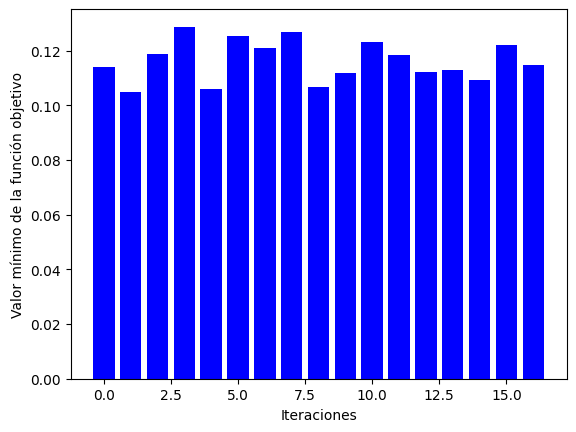

In [ ]:
print("Media de los resultados:", media_resultados)
print("Desviación estándar de los resultados:", std_resultados)

# Crear la gráfica de barras
plt.bar(list(range(len(all_results_fun))) ,all_results_fun, color='blue')

# Personalizar la gráfica
plt.xlabel('Iteraciones')
plt.ylabel('Valor mínimo de la función objetivo')
#plt.title('Gráfica de Barras')

# Mostrar la gráfica
plt.show()

## **Conjunto de valores de las variables de decisión que optimizan la función objetivo**

Promedio del numero de estimadores:  102.22176716791388
Promedio de la Profundidad máxima del árbol:  25.845008828945673
Promedio del Mínimo de muestras requeridas para dividir un nodo:  11.939651803997908
Promedio del Mínimo de muestras requeridas en cada hoja:  3.1234342122851815


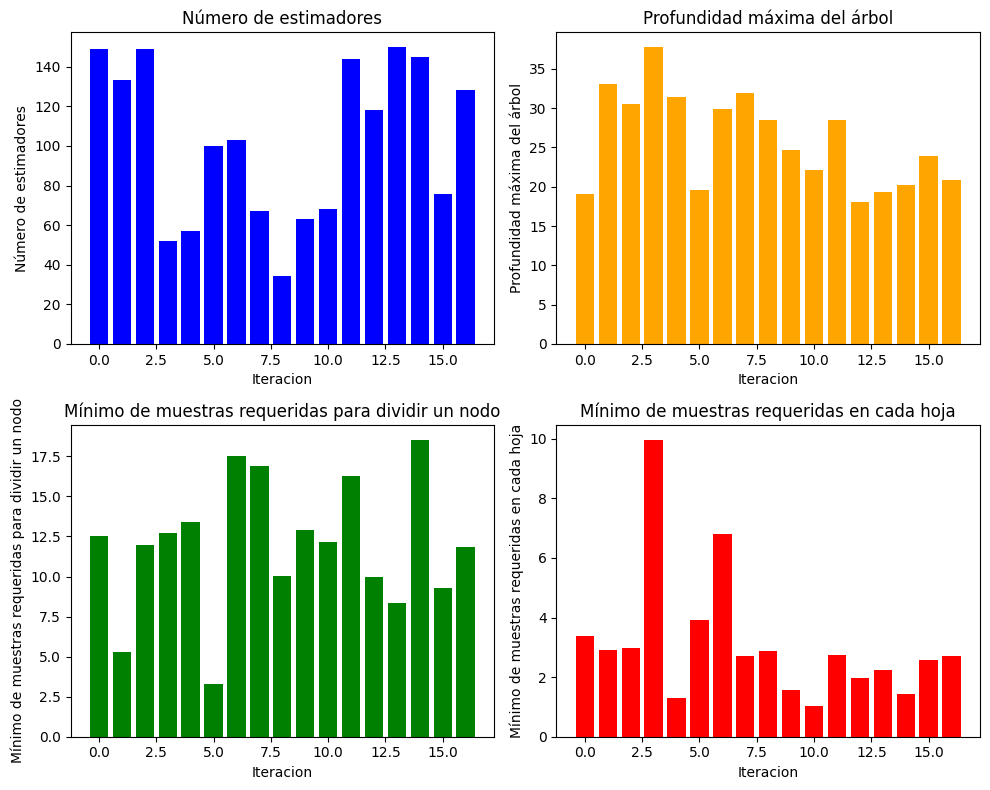

In [ ]:
# Crear una figura y ejes para subgráficas
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

n_estimadores = []
p_maxima = []
min_muestras_nodo = []
min_muestras_hoja = []

valores_eje_x = range(len(all_results_x))

for i in all_results_x:
  n_estimadores.append(i[0])
  p_maxima.append(i[1])
  min_muestras_nodo.append(i[2])
  min_muestras_hoja.append(i[3])


print("Promedio del numero de estimadores: ", np.mean(n_estimadores))
print("Promedio de la Profundidad máxima del árbol: ", np.mean(p_maxima))
print("Promedio del Mínimo de muestras requeridas para dividir un nodo: ", np.mean(min_muestras_nodo))
print("Promedio del Mínimo de muestras requeridas en cada hoja: ", np.mean(min_muestras_hoja))

# Gráfica 1
axs[0, 0].bar(valores_eje_x, n_estimadores, color='blue')
axs[0, 0].set_title('Número de estimadores')
axs[0, 0].set_xlabel('Iteracion')
axs[0, 0].set_ylabel('Número de estimadores')

# Gráfica 2
axs[0, 1].bar(valores_eje_x, p_maxima, color='orange')
axs[0, 1].set_title('Profundidad máxima del árbol')
axs[0, 1].set_xlabel('Iteracion')
axs[0, 1].set_ylabel('Profundidad máxima del árbol')

# Gráfica 3
axs[1, 0].bar(valores_eje_x, min_muestras_nodo, color='green')
axs[1, 0].set_title('Mínimo de muestras requeridas para dividir un nodo')
axs[1, 0].set_xlabel('Iteracion')
axs[1, 0].set_ylabel('Mínimo de muestras requeridas para dividir un nodo')

# Gráfica 4
axs[1, 1].bar(valores_eje_x, min_muestras_hoja, color='red')
axs[1, 1].set_title('Mínimo de muestras requeridas en cada hoja')
axs[1, 1].set_xlabel('Iteracion')
axs[1, 1].set_ylabel('Mínimo de muestras requeridas en cada hoja')

# Ajustar el diseño de las subgráficas
plt.tight_layout()

# Mostrar la figura
plt.show()

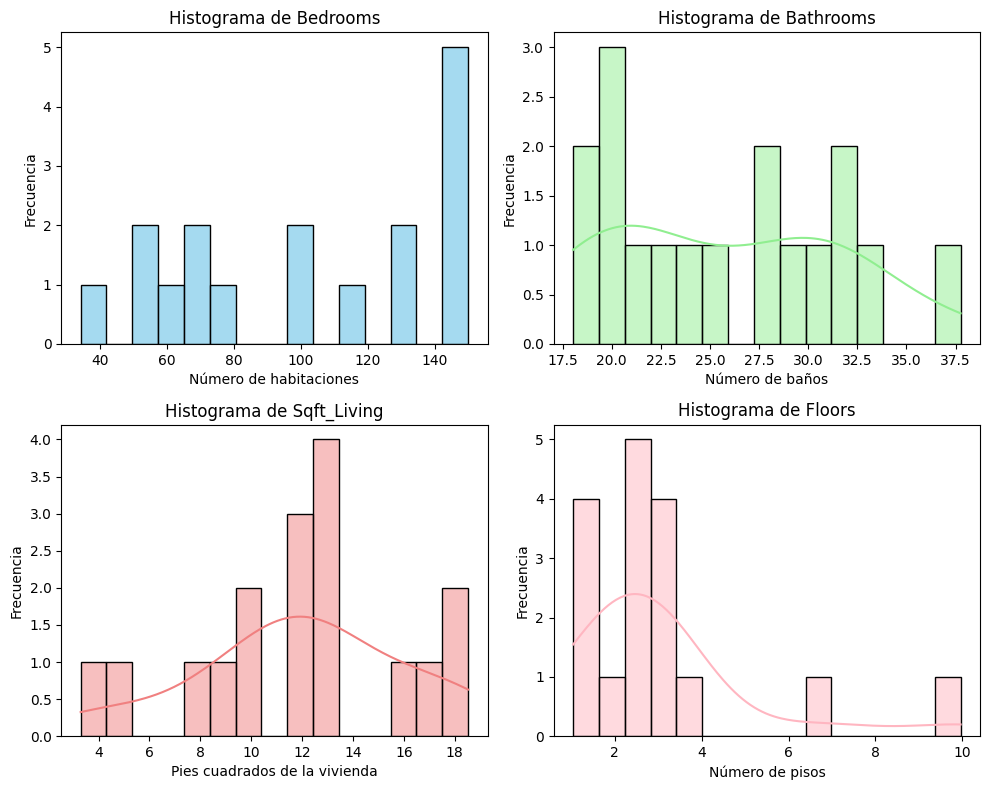

In [ ]:
# Crear subplots para los histogramas de cada variable
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Graficar histograma de bedrooms
sns.histplot(n_estimadores, ax=axes[0, 0], color='skyblue', kde=False, bins=15)
axes[0, 0].set_title('Histograma de Bedrooms')
axes[0, 0].set_xlabel('Número de habitaciones')
axes[0, 0].set_ylabel('Frecuencia')

# Graficar histograma de bathrooms
sns.histplot(p_maxima, ax=axes[0, 1], color='lightgreen', kde=True, bins=15)
axes[0, 1].set_title('Histograma de Bathrooms')
axes[0, 1].set_xlabel('Número de baños')
axes[0, 1].set_ylabel('Frecuencia')

# Graficar histograma de sqft_living
sns.histplot(min_muestras_nodo, ax=axes[1, 0], color='lightcoral', kde=True, bins=15)
axes[1, 0].set_title('Histograma de Sqft_Living')
axes[1, 0].set_xlabel('Pies cuadrados de la vivienda')
axes[1, 0].set_ylabel('Frecuencia')

# Graficar histograma de floors
sns.histplot(min_muestras_hoja, ax=axes[1, 1], color='lightpink', kde=True, bins=15)
axes[1, 1].set_title('Histograma de Floors')
axes[1, 1].set_xlabel('Número de pisos')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

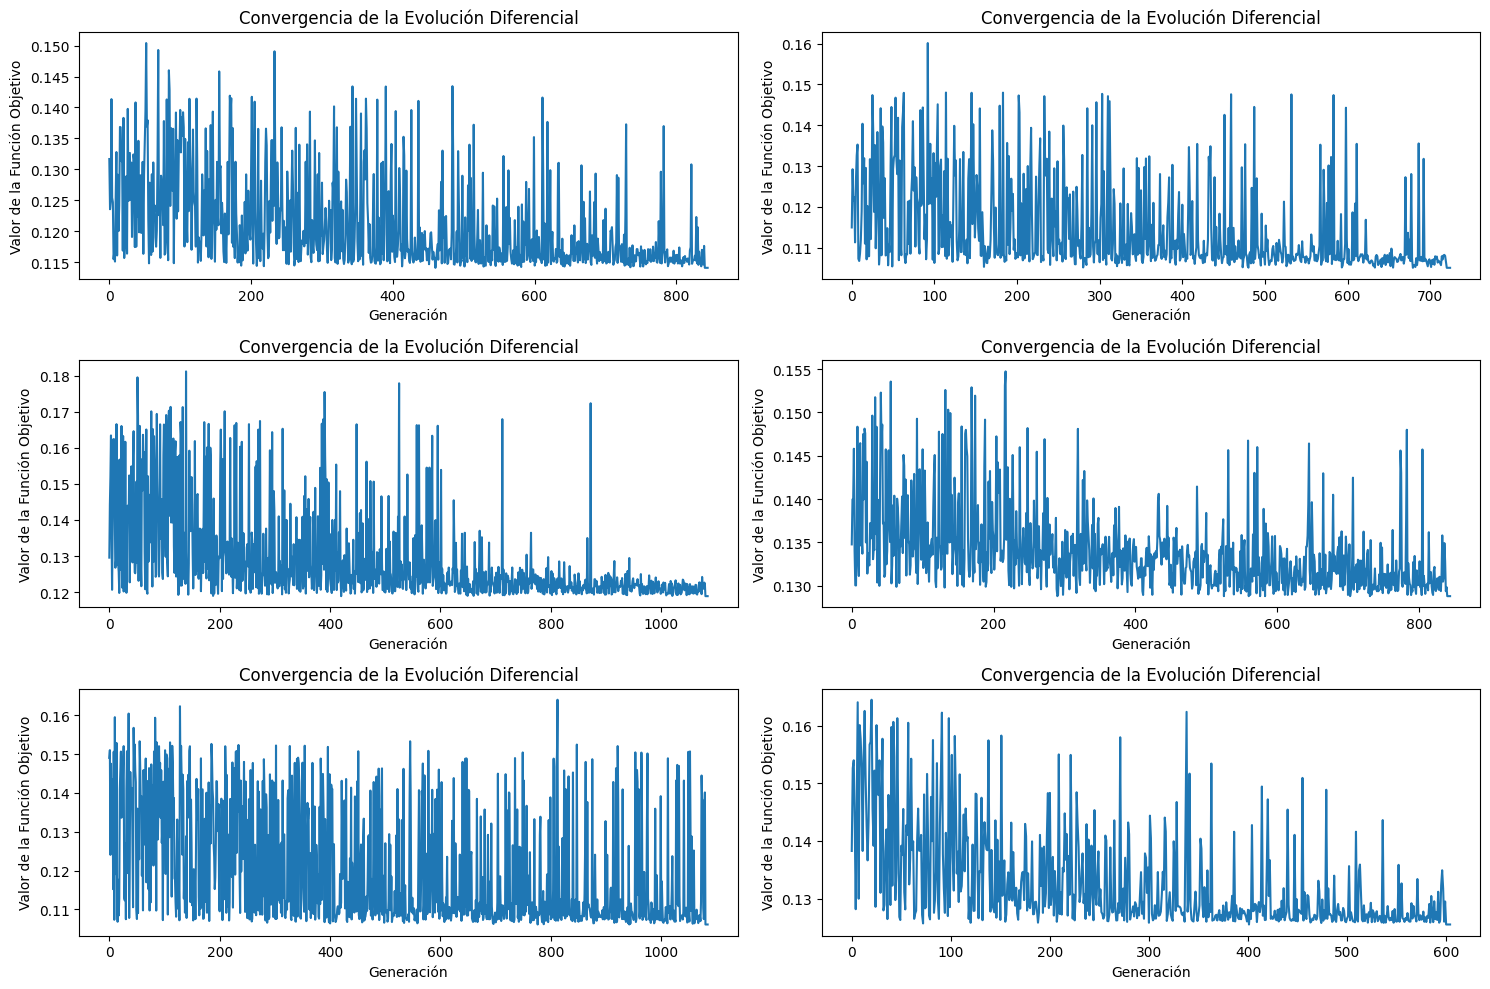

In [ ]:
# Crear subplots para los histogramas de cada variable
fig, axes = plt.subplots(3, 2, figsize=(15, 10))


# Graficar histograma de bedrooms
axes[0, 0].plot(np.array(range(len(historial['0']))), historial['0']) #sns.regplot(ax=axes[0,0], x=np.array(range(len(historial['0']))), y=historial['0'], color='skyblue')#.histplot(n_estimadores, ax=axes[0, 0], color='skyblue', kde=False, bins=15)
axes[0, 0].set_title('Convergencia de la Evolución Diferencial')
axes[0, 0].set_xlabel('Generación')
axes[0, 0].set_ylabel('Valor de la Función Objetivo')

# Graficar histograma de bedrooms
axes[0, 1].plot(np.array(range(len(historial['1']))), historial['1'])
axes[0, 1].set_title('Convergencia de la Evolución Diferencial')
axes[0, 1].set_xlabel('Generación')
axes[0, 1].set_ylabel('Valor de la Función Objetivo')

# Graficar histograma de bedrooms
axes[1, 0].plot(np.array(range(len(historial['2']))), historial['2'])
axes[1, 0].set_title('Convergencia de la Evolución Diferencial')
axes[1, 0].set_xlabel('Generación')
axes[1, 0].set_ylabel('Valor de la Función Objetivo')

# Graficar histograma de bedrooms
axes[1, 1].plot(np.array(range(len(historial['3']))), historial['3'])
axes[1, 1].set_title('Convergencia de la Evolución Diferencial')
axes[1, 1].set_xlabel('Generación')
axes[1, 1].set_ylabel('Valor de la Función Objetivo')

# Graficar histograma de bedrooms
axes[2, 0].plot(np.array(range(len(historial['4']))), historial['4'])
axes[2, 0].set_title('Convergencia de la Evolución Diferencial')
axes[2, 0].set_xlabel('Generación')
axes[2, 0].set_ylabel('Valor de la Función Objetivo')

# Graficar histograma de bedrooms
axes[2, 1].plot(np.array(range(len(historial['5']))), historial['5'])
axes[2, 1].set_title('Convergencia de la Evolución Diferencial')
axes[2, 1].set_xlabel('Generación')
axes[2, 1].set_ylabel('Valor de la Función Objetivo')



plt.tight_layout()
plt.show()

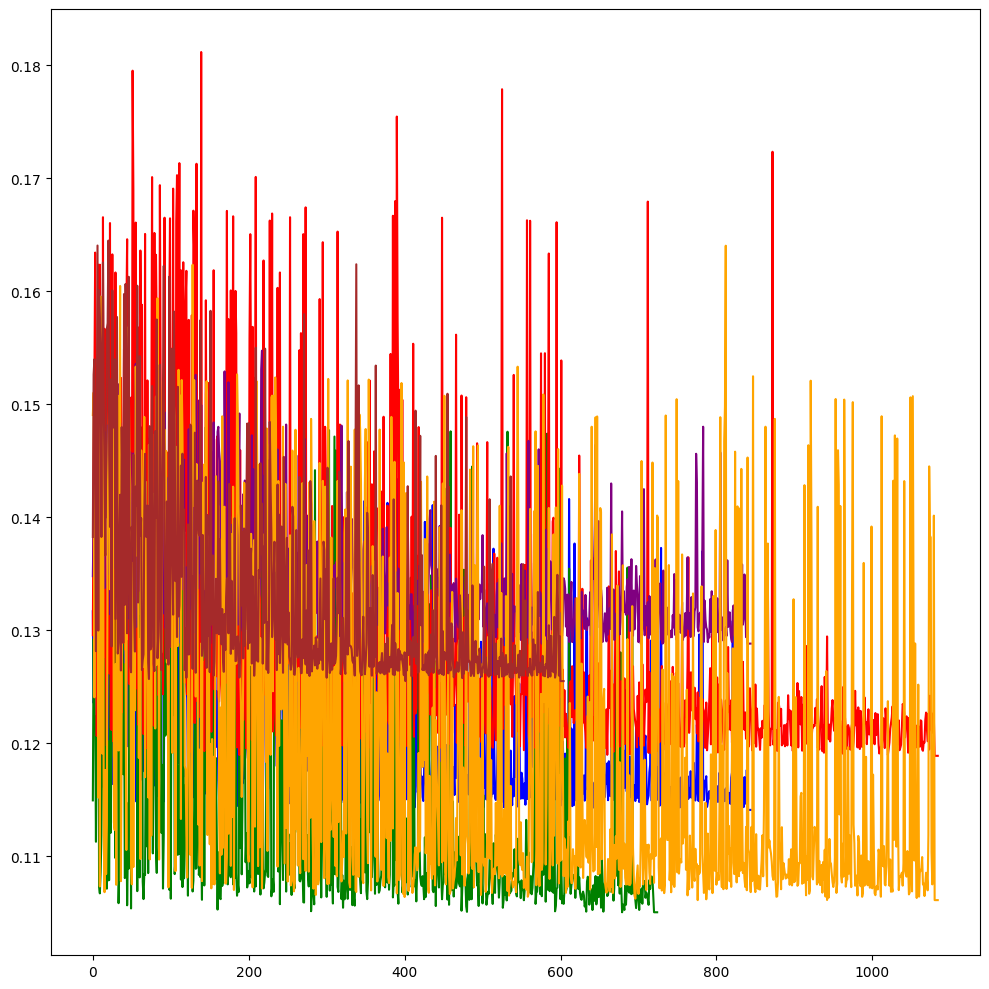

In [ ]:
# Crear la figura y el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar todas las curvas en el mismo gráfico con colores diferentes
ax.plot(np.array(range(len(historial['0']))), historial['0'], color='blue')
ax.plot(np.array(range(len(historial['1']))), historial['1'], color='green')
ax.plot(np.array(range(len(historial['2']))), historial['2'], color='red')
ax.plot(np.array(range(len(historial['3']))), historial['3'], color='purple')
ax.plot(np.array(range(len(historial['4']))), historial['4'], color='orange')
ax.plot(np.array(range(len(historial['5']))), historial['5'], color='brown')

# Añadir leyenda
#ax.legend()

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
v_min_fo = min(all_results_fun)
index_min = all_results_fun.index(v_min_fo)
parametros_min = all_results_x[index_min]

n_estimadores_min = int(parametros_min[0])
p_maxima_min = int(parametros_min[1])
min_muestras_nodo_min = int(parametros_min[2])
min_muestras_hoja_min = int(parametros_min[3])

print("Valor minimo de la funcion objetivo: ", v_min_fo)
print("Numero de estimadores: ", n_estimadores_min)
print("Profundidad máxima del árbol: ", p_maxima_min)
print("Mínimo de muestras requeridas para dividir un nodo: ", min_muestras_nodo_min)
print("Mínimo de muestras requeridas en cada hoja: ", min_muestras_hoja_min)

Valor minimo de la funcion objetivo:  0.10503691444499165
Numero de estimadores:  133
Profundidad máxima del árbol:  33
Mínimo de muestras requeridas para dividir un nodo:  5
Mínimo de muestras requeridas en cada hoja:  2


RMSE %:  3.180412712586496
R2:  0.7966973024079042


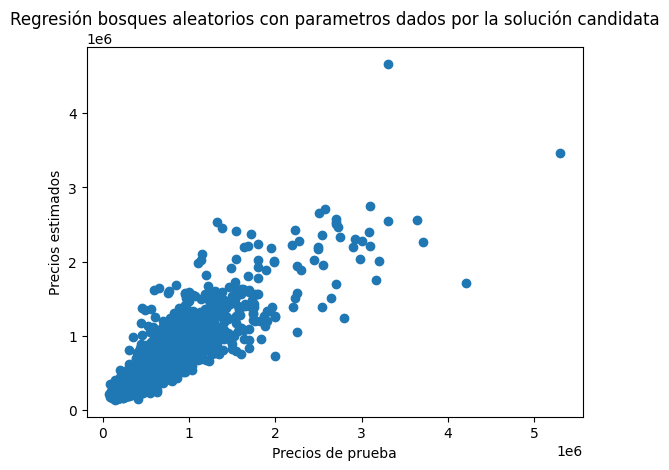

In [ ]:
# Construye el modelo con los parámetros dados por la solución candidata
modelo_rf = RandomForestRegressor(n_estimators=n_estimadores_min,
                                  max_depth=p_maxima_min,
                                  min_samples_split=min_muestras_nodo_min,
                                  min_samples_leaf=min_muestras_hoja_min,
                                  random_state=42)

# Entrena el modelo
modelo_rf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Calcular RMSE
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse_percentage = np.sqrt(mse) / np.ptp(y_test)  # Calcular RMSE% en relación con el rango de la variable de respuesta

# Calcular R^2
r2 = r2_score(y_test, y_pred)

plt.title("Regresión bosques aleatorios con parametros dados por la solución candidata")
plt.xlabel("Precios de prueba")
plt.ylabel("Precios estimados")
plt.scatter(y_test, y_pred)

print('RMSE %: ', rmse_percentage*100)
print('R2: ', r2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Definir y entrenar el modelo
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

# Obtener el árbol de decisión
tree_rules = export_text(model_tree, feature_names=list(X_train.columns))
print(tree_rules)

|--- sqft_living <= 2847.00
|   |--- sqft_living <= 2009.50
|   |   |--- sqft_living <= 1402.50
|   |   |   |--- sqft_living <= 1104.00
|   |   |   |   |--- sqft_living <= 865.00
|   |   |   |   |   |--- sqft_living <= 605.00
|   |   |   |   |   |   |--- sqft_living <= 555.00
|   |   |   |   |   |   |   |--- sqft_living <= 525.00
|   |   |   |   |   |   |   |   |--- sqft_living <= 425.00
|   |   |   |   |   |   |   |   |   |--- sqft_living <= 330.00
|   |   |   |   |   |   |   |   |   |   |--- value: [142000.00]
|   |   |   |   |   |   |   |   |   |--- sqft_living >  330.00
|   |   |   |   |   |   |   |   |   |   |--- bathrooms <= 0.88
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- bathrooms >  0.88
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- sqft_living >  425.00
|   |   |   |   |   |   |   |   |   |--- sqft_living <= 435.00
|   |   |   |   |

In [ ]:
model_tree = DecisionTreeRegressor(max_depth=3)
model_tree.fit(X_train, y_train)
tree_rules = export_text(model_tree, feature_names=list(X_train.columns))
print(tree_rules)

|--- sqft_living <= 2847.00
|   |--- sqft_living <= 2009.50
|   |   |--- sqft_living <= 1402.50
|   |   |   |--- value: [337200.05]
|   |   |--- sqft_living >  1402.50
|   |   |   |--- value: [424529.85]
|   |--- sqft_living >  2009.50
|   |   |--- sqft_living <= 2438.50
|   |   |   |--- value: [522275.71]
|   |   |--- sqft_living >  2438.50
|   |   |   |--- value: [621058.76]
|--- sqft_living >  2847.00
|   |--- sqft_living <= 4062.50
|   |   |--- sqft_living <= 3406.00
|   |   |   |--- value: [773642.69]
|   |   |--- sqft_living >  3406.00
|   |   |   |--- value: [996506.43]
|   |--- sqft_living >  4062.50
|   |   |--- sqft_living <= 6280.00
|   |   |   |--- value: [1432658.53]
|   |   |--- sqft_living >  6280.00
|   |   |   |--- value: [2871750.00]



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Definir y entrenar el modelo
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

importances = model_rf.feature_importances_

feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

top_features = feature_importances.head(10)  # selecciona las 10 características principales

print(top_features)

sqft_living    0.644688
zipcode        0.255809
bathrooms      0.046406
bedrooms       0.030170
floors         0.022927
dtype: float64


In [ ]:
!pip install -U scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=7b22b45e89111b073610c3aa81e94f47f9be882423306be6742a0c5fb8bcd4e1
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


# **OTRO**

## 1

In [ ]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=fe6956e304eb43aa9127881058bcaa6b8a017b92d0155564357c0bc8304dc141
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Crear sistema difuso
def create_fuzzy_system(X_train, y_train):
    # Aplicar PCA para reducir dimensionalidad
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train)

    # Generar conjuntos difusos para las características
    bedrooms = fuzz.gaussmf(X_pca[:, 0], np.mean(X_pca[:, 0]), np.std(X_pca[:, 0]))
    sqft_living = fuzz.gaussmf(X_pca[:, 1], np.mean(X_pca[:, 1]), np.std(X_pca[:, 1]))

    # Combinar los conjuntos difusos
    rule1 = np.fmin(bedrooms, sqft_living)

    # Devolver un array bidimensional
    return rule1.reshape(-1, 1) * np.mean(y_train)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import skfuzzy as fuzz

# Normalizar características
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)

# Preparar datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)

# Inicializar listas para almacenar resultados
validation_errors = []

# Realizar 1000 corridas independientes
for run in range(1000):
    # Crear sistema difuso y obtener salida
    fuzzy_output = create_fuzzy_system(X_train, y_train)

    # Entrenar red neuronal con retropropagación
    model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)
    model.fit(X_train, fuzzy_output)

    # Evaluar en conjunto de prueba
    y_pred = model.predict(X_test)
    validation_error = mean_squared_error(y_test, y_pred)
    validation_errors.append(validation_error)

# Graficar error de validación versus epochs
plt.plot(validation_errors)
plt.xlabel('Run')
plt.ylabel('Validation Error')
plt.title('Validation Error vs Run')
plt.show()

# Graficar histograma de errores de validación
plt.hist(validation_errors, bins=30, edgecolor='black')
plt.xlabel('Validation Error')
plt.ylabel('Frequency')
plt.title('Histogram of Validation Errors')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't conv

## 2

In [ ]:
!pip install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.7 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# Normalizar características
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convertir a tensores de PyTorch
X_tensor = torch.FloatTensor(X_normalized)
y_tensor = torch.FloatTensor(y.values).view(-1, 1)

# Definir función de membresía triangular
def triangular_mf(x, a, b, c):
    return torch.max(torch.min((x - a) / (b - a), (c - x) / (c - b)), torch.zeros_like(x))

# Definir modelo ANFIS
class ANFIS(nn.Module):
    def __init__(self, num_mfs, num_outputs):
        super(ANFIS, self).__init__()
        self.layer1 = nn.Linear(X_tensor.shape[1], num_mfs[0])
        self.layer2 = nn.Linear(num_mfs[0], num_mfs[1])
        self.layer3 = nn.Linear(num_mfs[1], num_outputs)

        self.mf_a = nn.Parameter(torch.rand((num_mfs[0],)))
        self.mf_b = nn.Parameter(torch.rand((num_mfs[0],)))
        self.mf_c = nn.Parameter(torch.rand((num_mfs[0],)))

    def forward(self, x):
        # Calcular las funciones de membresía
        mu_layer1 = triangular_mf(x, self.mf_a, self.mf_b, self.mf_c)
        mu_layer2 = torch.tanh(self.layer1(mu_layer1))
        mu_layer3 = torch.tanh(self.layer2(mu_layer2))

        # Multiplicar por parámetros aprendidos en capa lineal
        x = self.layer3(mu_layer3)

        return x

# Inicializar listas para almacenar resultados
validation_errors = []

# Realizar 1000 corridas independientes
for run in range(1000):
    # Aplicar PCA para reducir dimensionalidad
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_normalized)

    # Configurar modelo ANFIS
    model = ANFIS(num_mfs=[3, 3], num_outputs=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Entrenar el modelo ANFIS
    for epoch in range(10):
        optimizer.zero_grad()
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

    # Evaluar en conjunto de prueba
    X_test_pca = torch.FloatTensor(pca.transform(X_normalized))
    y_pred = model(X_test_pca).detach().numpy()

    # Calcular error de validación
    validation_error = mean_squared_error(y, y_pred)
    validation_errors.append(validation_error)

# Graficar error de validación versus epochs
plt.plot(validation_errors)
plt.xlabel('Run')
plt.ylabel('Validation Error')
plt.title('Validation Error vs Run')
plt.show()

# Graficar histograma de errores de validación
plt.hist(validation_errors, bins=30, edgecolor='black')
plt.xlabel('Validation Error')
plt.ylabel('Frequency')
plt.title('Histogram of Validation Errors')
plt.show()

RuntimeError: ignored

# **Optimización por enjambre de partículas**

In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=1727d081f180467ee39d6655340c6aae44722f36a2b67f62db4f55460f0d4ce6
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


## **Funcion fitennes**

In [ ]:
historial_fun_pso = {}

# Definir la función de fitness para PSO
def fitness_function(params, *args):
    # Desempaquetar los parámetros
    model_params = {
        'n_estimators': int(params[0]),
        'max_depth': int(params[1]),
        'min_samples_split': int(params[2]),
        'min_samples_leaf': int(params[3])
    }

    # Crear un modelo de regresión por bosques aleatorios con los parámetros dados
    model = RandomForestRegressor(**model_params)

    # Ajustar el modelo y realizar predicciones
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular R2 y RMSE utilizando validación cruzada en el conjunto de entrenamiento
    mse = mean_squared_error(y_test, y_pred)
    rmse_percentage = np.sqrt(mse) / np.ptp(y_test)  # Calcular RMSE% en relación con el rango de la variable de respuesta

    # Calcular R^2
    r2 = r2_score(y_test, y_pred)

    #print("r2: " , r2)
    #print("rmse%: " , rmse_percentage)

    res = 0.5 * rmse_percentage + 0.5 * (1 - r2) #(1 - r2)

    historial_fun_pso[str(iteracion)].append(res)

    # Devolver una combinación ponderada de RMSE y 1 - R^2 (minimizar ambos)
    return res

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from pyswarm import pso


historial_fun_pso = {}
iteracion = "1"
best_params = {}
fo = {}

# Definir límites para los parámetros (n_estimators y max_depth)
lb = [20, 10, 2, 1]  # Límites inferiores
ub = [150, 40, 20, 20]  # Límites superiores

for i in range(1):
    iteracion = str(i)
    print("Inicio: ", iteracion)

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    historial_fun_pso[iteracion] = []
    fo[iteracion] = ''

    # Realizar la optimización por enjambre de partículas (PSO)
    best_params[iteracion] = []
    best_params[iteracion], fo[iteracion] = pso(fitness_function, lb, ub)
    print("Fin: ", iteracion)


# Crear el modelo final con los parámetros óptimos
#final_model_params = {'n_estimators': int(best_params[0]), 'max_depth': int(best_params[1])}
#final_model = RandomForestRegressor(**final_model_params)

# Ajustar el modelo final al conjunto de entrenamiento completo
#final_model.fit(X, y)

# Realizar predicciones con el modelo final (puedes ajustar esta parte según tus necesidades)
# Por ejemplo, si tienes un nuevo conjunto de características para predecir precios de viviendas:
# new_data = pd.DataFrame({'bedrooms': ..., 'bathrooms': ..., 'sqft_living': ..., 'floors': ...}, index=[0])
# predicted_price = final_model.predict(new_data)


Inicio:  0


In [ ]:
# Mostrar los parámetros óptimos encontrados
print("Parámetros óptimos encontrados:")
print("Número de estimadores (n_estimators):", int(best_params[iteracion][0]))
print("Profundidad máxima (max_depth):", int(best_params[iteracion][1]))
print("Mínimo de muestras para dividir (min_samples_split):", int(best_params[iteracion][2]))
print("Mínimo de muestras en hoja (min_samples_leaf):", int(best_params[iteracion][3]))

In [ ]:
# Graficar la convergencia
generaciones = range(len(historial_fun_pso[str(iteracion)]))
plt.plot(generaciones, historial_fun_pso[str(iteracion)], label='Convergencia')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función fitennes')
plt.title('Convergencia de la Optimización por enjambre de partículas')
plt.legend()
plt.show()